In [1]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
import pandas as pd
from FRespuestastyfdefiltrosFIReIIR import FIRrespt,IIRrespt,FIRrespf,IIRrespf
from FTransformaciones_tiempo_frecuencia import Espectro, señal
from FMedia_Movil import MovingAverage
from scipy.optimize import curve_fit
from scipy import signal #detrend
from scipy.fftpack import fft, fftfreq, ifft

importing Jupyter notebook from FRespuestastyfdefiltrosFIReIIR.ipynb
importing Jupyter notebook from FTransformaciones_tiempo_frecuencia.ipynb
importing Jupyter notebook from FMedia_Movil.ipynb


<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-24 a la(s) 18.20.45.png">

## Apartado A

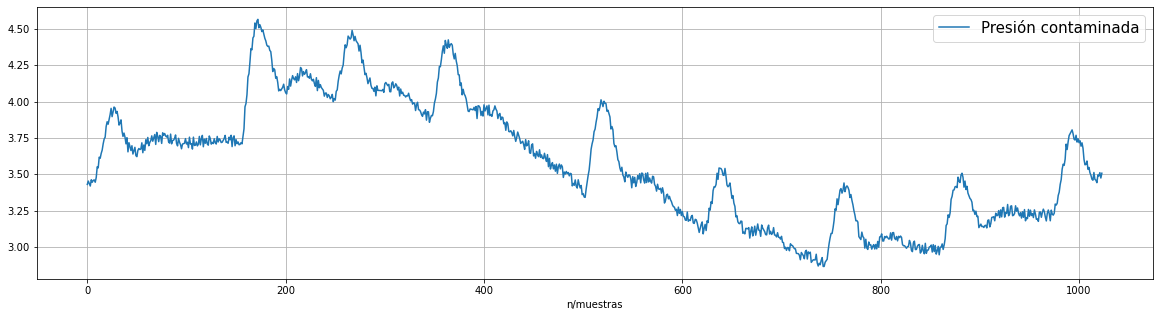

In [2]:
Pcont = np.loadtxt('Pcontaminada.txt')
n1 = np.arange (len(Pcont))

plt.figure(figsize=(20,5))
plt.plot(n1,Pcont,label="Presión contaminada")
plt.xlabel ("n/muestras")
plt.legend (fontsize=15)
plt.grid (True)
plt.show()

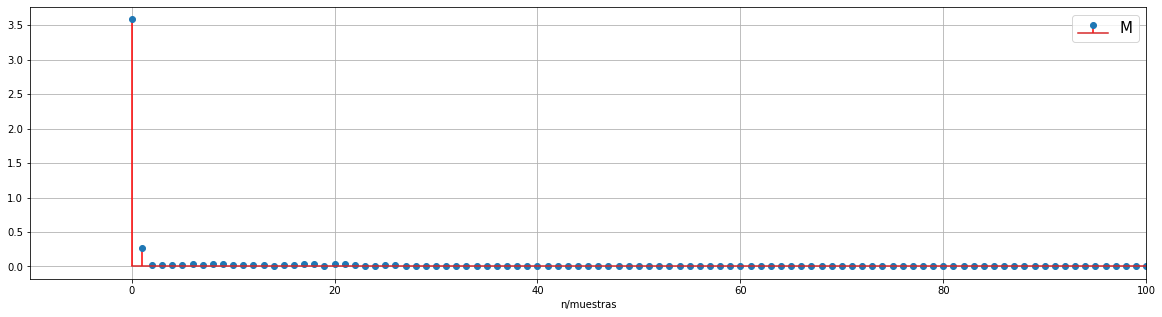

In [3]:
esp_1 = fft (Pcont) / len (Pcont) #normalizado
p1 = np.arange (len(n1))

plt.figure(figsize=(20,5))
plt.stem(p1, abs(esp_1),"red")
plt.grid (True)
plt.legend ("Módulo del espectro", fontsize=15)
plt.xlabel ("n/muestras")
#plt.ylim (0,0.04)
plt.xlim (-10,100)
plt.show()

In [4]:
esp_1c = np.copy (esp_1)
N1 = len(n1)

esp_1c [0] = 1e-5
esp_1c [1] = 1e-5
esp_1c [N1-1] = 1e-5

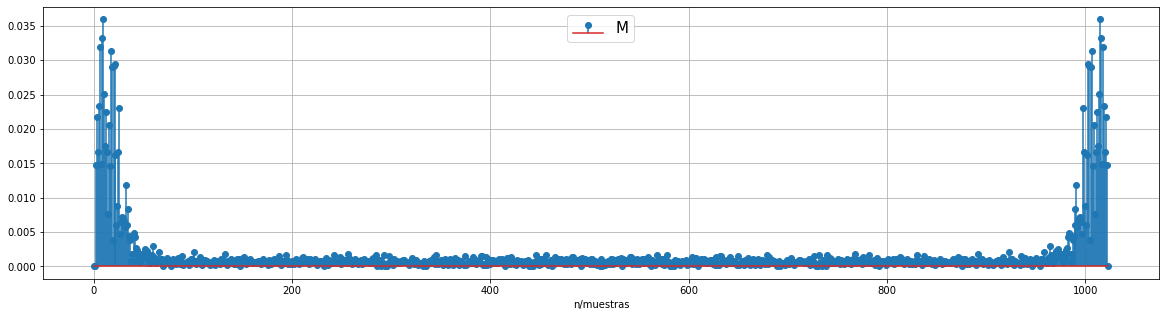

In [5]:
plt.figure(figsize=(20,5))
plt.stem(p1, abs(esp_1c),)
plt.grid (True)
plt.legend ("Módulo del espectro", fontsize=15)
plt.xlabel ("n/muestras")
#plt.ylim (0,0.04)
#plt.xlim (-10,100)
plt.show()

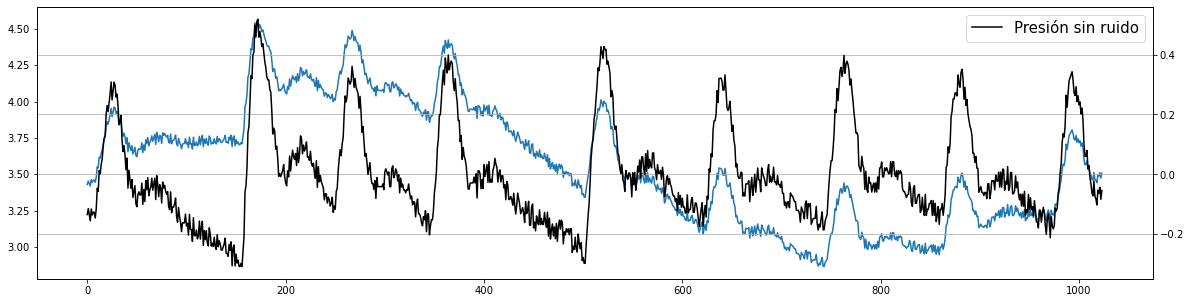

In [6]:
y1 = señal (esp_1c)


plt.figure(figsize=(20,5))
plt.plot(n1,Pcont,label="Presión contaminada")
plt.twinx()
plt.plot(n1,y1,label="Presión sin ruido",color="k")
plt.xlabel ("n/muestras")
plt.legend (fontsize=15)
plt.grid (True)
plt.show()

## Usando ajustes de curvas

In [7]:
def fsin(x,a,f,c):
    return a*np.sin (2*np.pi*f*x) + c

In [8]:
popt1, pcov1 = curve_fit (fsin,n1,Pcont,p0=(0.5,1e-3,0.1)) #realizo el ajuste

popt1

array([5.41760524e-01, 9.71967295e-04, 3.58467112e+00])

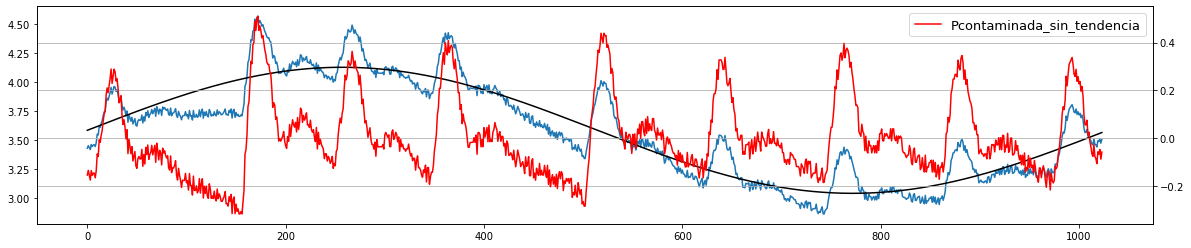

In [9]:
y23 = Pcont - fsin(n1,*popt1)

plt.figure(figsize=(20,4))
plt.plot(n1, Pcont,label='Pcontaminada')
plt.plot(n1,fsin(n1,*popt1),'k',label='fsin')
plt.twinx()
plt.plot(n1,y23,'r',label='Pcontaminada_sin_tendencia')
plt.xlabel('n/muestras',fontsize=12)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

## Apartado B

In [10]:
ECGcont = np.loadtxt ("ECGconruido.txt")
nb1 = np.arange (len(ECGcont))
Nb1 = len(nb1)

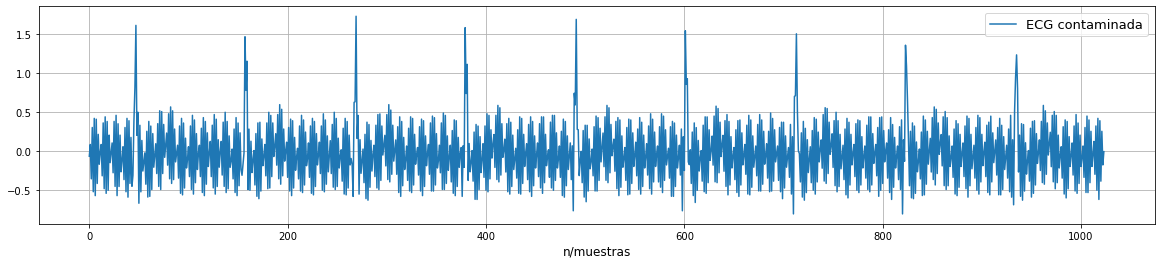

In [11]:
plt.figure(figsize=(20,4))
plt.plot(nb1, ECGcont,label='ECG contaminada')
plt.xlabel('n/muestras',fontsize=12)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

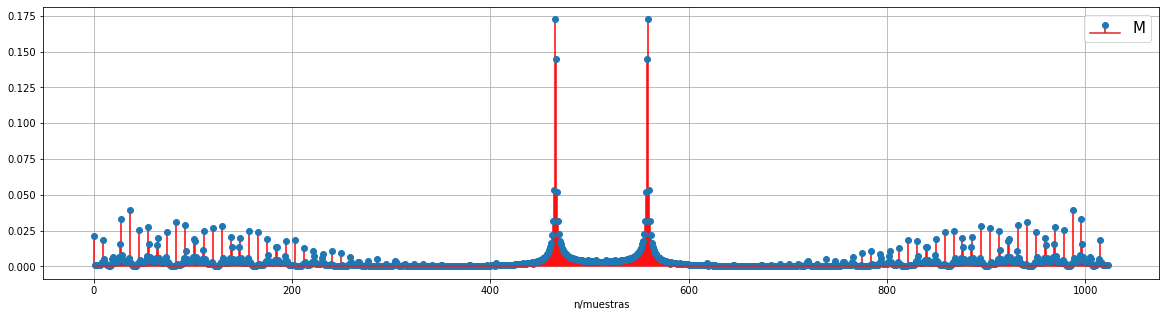

In [12]:
esp_b1 = fft (ECGcont) / len (ECGcont)
pb1 = np.arange (len(nb1))


plt.figure(figsize=(20,5))
plt.stem(pb1, abs(esp_b1),"red")
plt.grid (True)
plt.legend ("Módulo del espectro", fontsize=15)
plt.xlabel ("n/muestras")
#plt.ylim (0,0.04)
#plt.xlim (-10,100)
plt.show()

In [13]:
Nb1 , Nb1/2

(1024, 512.0)

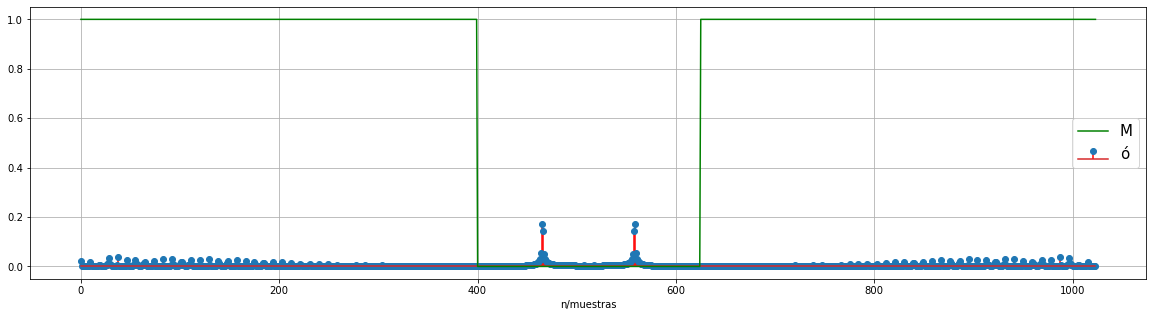

In [14]:
esp_fil = np.piecewise (pb1, [np.absolute (pb1-Nb1/2) > 112], [lambda pb1: 1, lambda pb1: 0.0005])


plt.figure(figsize=(20,5))
plt.stem(pb1, abs(esp_b1),"red")
plt.plot (pb1,abs(esp_fil),color="green",label="y")
plt.grid (True)
plt.legend ("Módulo del espectro", fontsize=15)
plt.xlabel ("n/muestras")
plt.show()

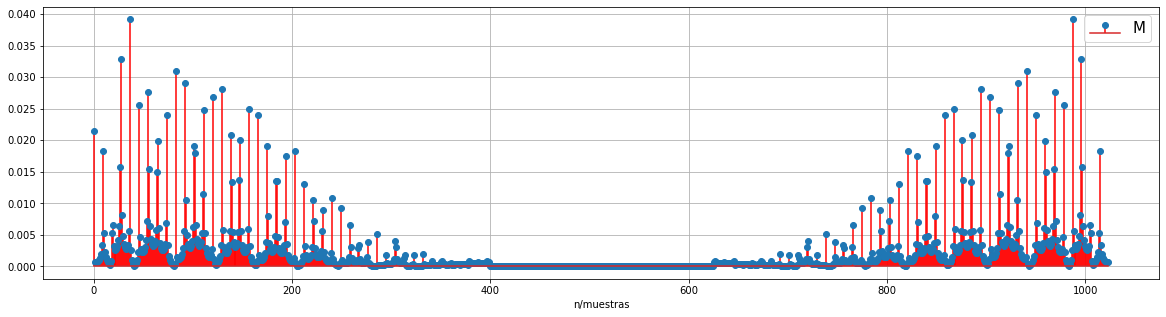

In [15]:
esp_bfill = esp_b1 * esp_fil

plt.figure(figsize=(20,5))
plt.stem(pb1, abs(esp_bfill),"red")
plt.grid (True)
plt.legend ("Módulo del espectro", fontsize=15)
plt.xlabel ("n/muestras")
plt.show()

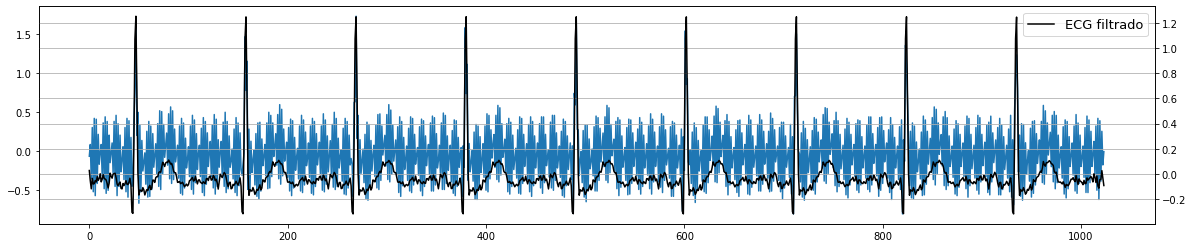

In [16]:
y_b = señal (esp_bfill)

plt.figure(figsize=(20,4))
plt.plot(nb1, ECGcont,label='ECG contaminada')
plt.twinx()
plt.plot(nb1, y_b,label='ECG filtrado',color="black")
plt.xlabel('n/muestras',fontsize=12)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

## Apartado C

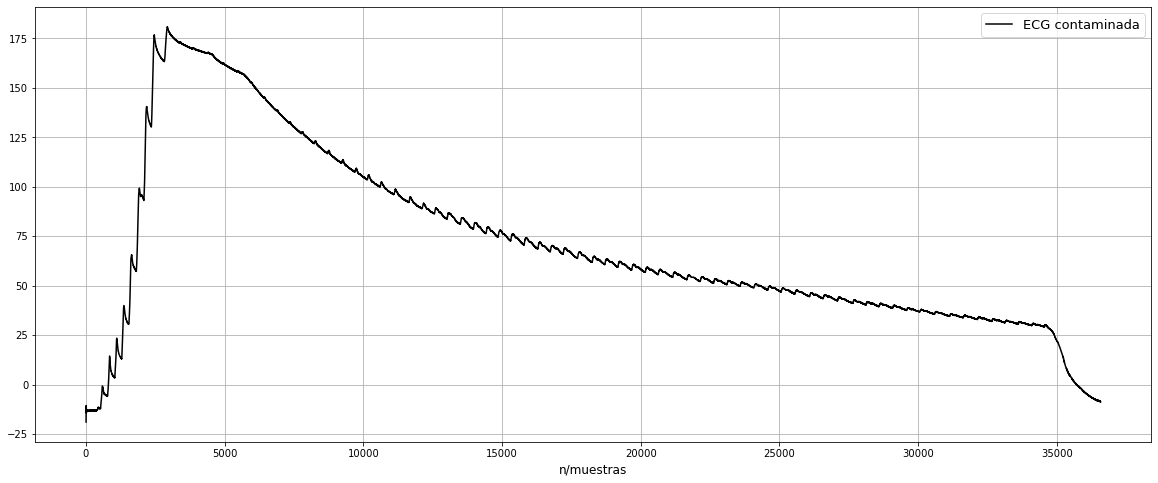

In [17]:
Pres = np.loadtxt ("Pres.txt")
nc1 = np.arange (len(Pres))

plt.figure(figsize=(20,8))
plt.plot(nc1, Pres,label='ECG contaminada',color="k")
plt.xlabel('n/muestras',fontsize=12)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

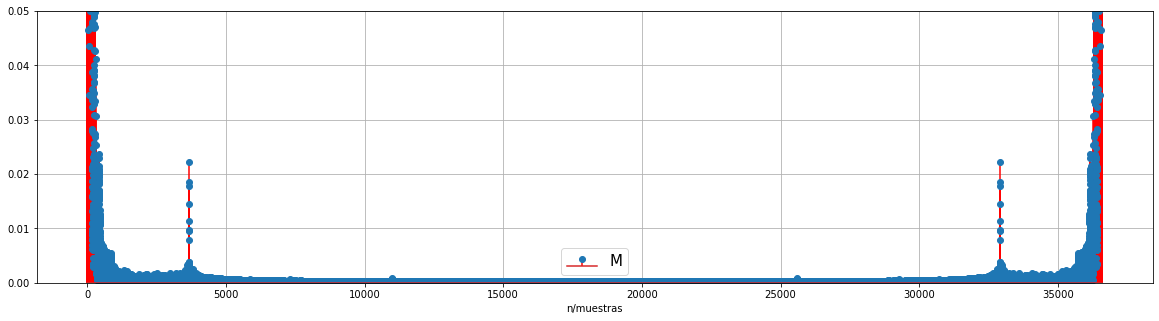

In [18]:
#Calculamos el espectro
esp_lc = fft (Pres) / len (Pres)
pc = np.arange (len(nc1))

plt.figure(figsize=(20,5))
plt.stem(pc, np.abs(esp_lc),"red")
plt.legend ("Módulo del espectro", fontsize=15)
plt.xlabel ("n/muestras")
plt.ylim ([0,0.05])
plt.grid (True)
plt.show()

In [19]:
#Supongamos que queremos eliminar las componentes de BAJA frencuencia
Nc = len (nc1)

espectroFiltrado1 = np.copy (esp_lc)
espectroFiltrado1 [1:21] = 0.002
espectroFiltrado1 [(Nc-1):(Nc-21)] = 0.002
espectroFiltrado1 [0] = 0.002
espectroFiltrado1 [-1] = 0.002

(0.0, 5000.0)

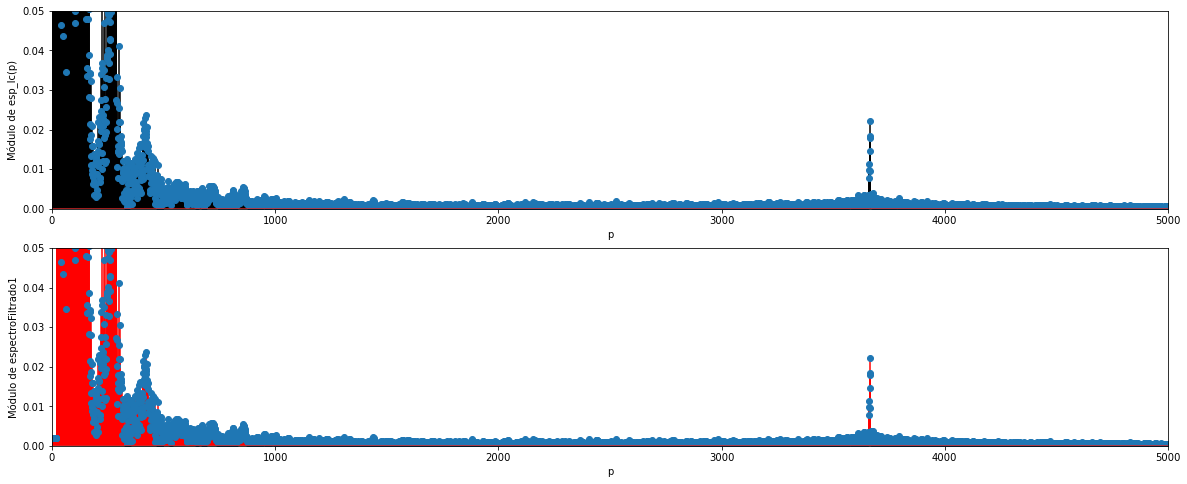

In [20]:
plt.figure(figsize=(20,8))
plt.subplot (2,1,1)
plt.stem(pc,np.abs(esp_lc),"k")
plt.xlabel ("p")
plt.ylabel ("Módulo de esp_lc(p)")
plt.ylim ([0,0.05])
plt.xlim (0,5000)

plt.subplot(2,1,2)
plt.stem(pc,np.abs(espectroFiltrado1),"r")
plt.xlabel ("p")
plt.ylabel ("Módulo de espectroFiltrado1")
plt.ylim ([0,0.05])
plt.xlim (0,5000)

/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


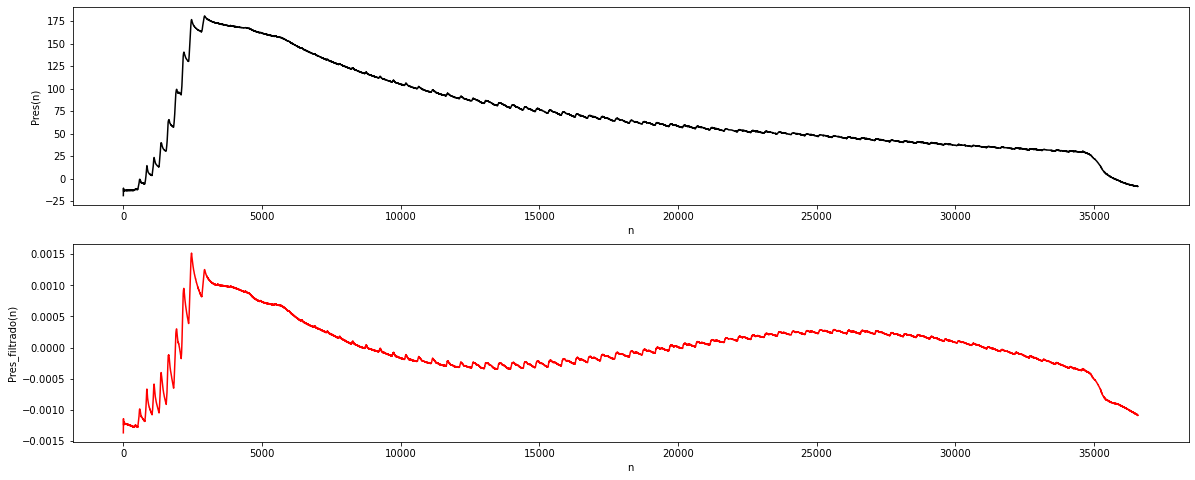

In [27]:
#Reconstruyo la señal
Pres_filtrado = ifft (espectroFiltrado1)

plt.figure(figsize=(20,8))
plt.subplot (2,1,1)
plt.plot(nc1,Pres,"k")
plt.xlabel ("n")
plt.ylabel ("Pres(n)")

plt.subplot(2,1,2)
plt.plot(nc1,Pres_filtrado,"r")
plt.xlabel ("n")
plt.ylabel ("Pres_filtrado(n)")
plt.show()

/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


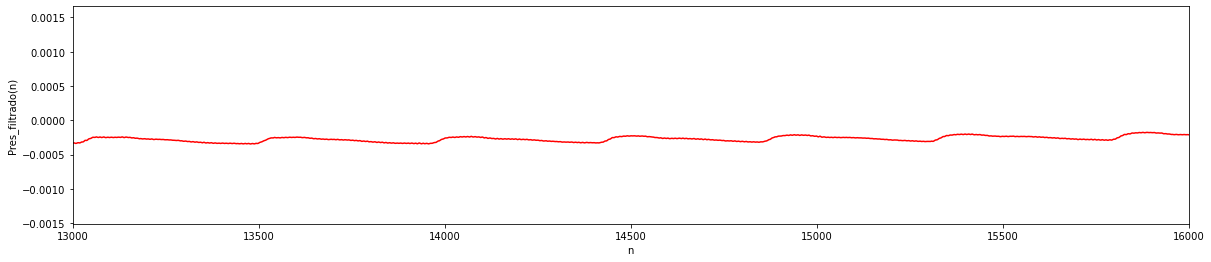

In [34]:
plt.figure(figsize=(20,4))
plt.plot(nc1,Pres_filtrado,"r")
plt.xlabel ("n")
plt.ylabel ("Pres_filtrado(n)")
plt.xlim (13000,16000)
#plt.ylim(-0.0001,0.0001)
plt.show()

In [38]:
Nc1 = len (nc1)

espectroFiltrado2 = np.copy (esp_lc)
espectroFiltrado2 [22:4000] = 0.002
espectroFiltrado2 [(Nc1-4000):(Nc1-22)] = 0.002

(-10.0, 5000.0)

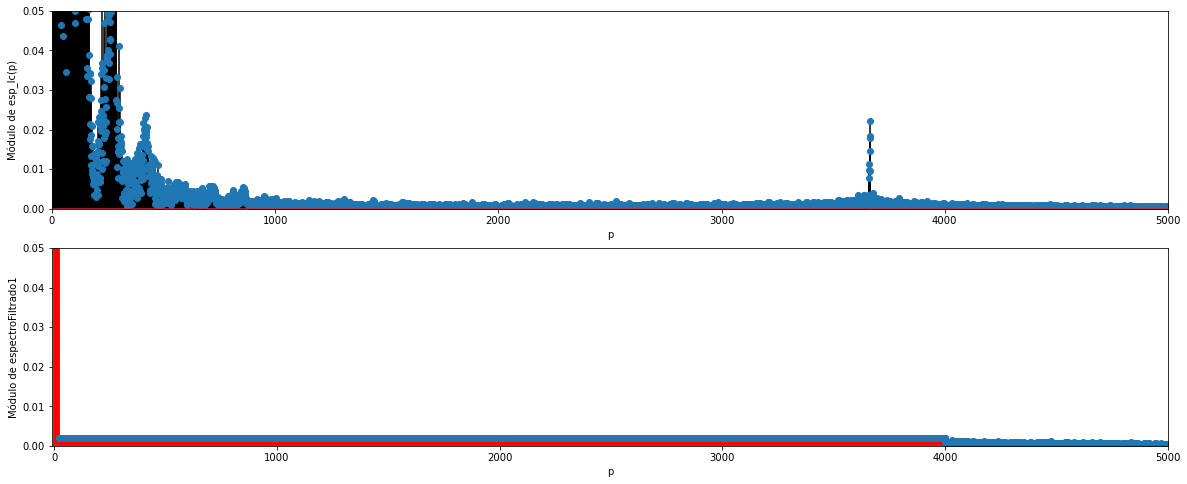

In [40]:
plt.figure(figsize=(20,8))
plt.subplot (2,1,1)
plt.stem(pc,np.abs(esp_lc),"k")
plt.xlabel ("p")
plt.ylabel ("Módulo de esp_lc(p)")
plt.ylim ([0,0.05])
plt.xlim (0,5000)

plt.subplot(2,1,2)
plt.stem(pc,np.abs(espectroFiltrado2),"r")
plt.xlabel ("p")
plt.ylabel ("Módulo de espectroFiltrado1")
plt.ylim ([0,0.05])
plt.xlim (-10,5000)

/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


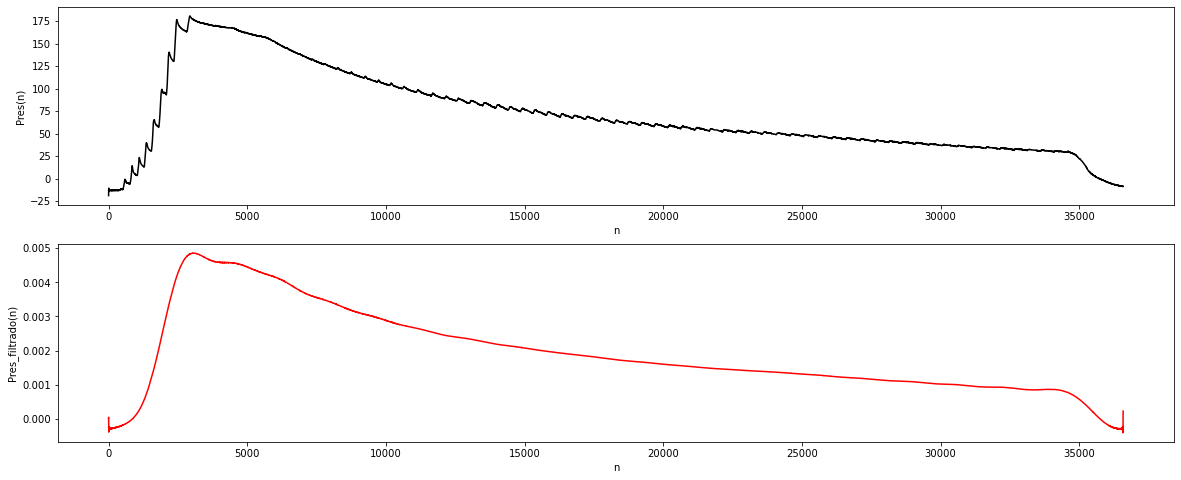

In [41]:
#Reconstruyo la señal
Pres_filtrado2 = ifft (espectroFiltrado2)

plt.figure(figsize=(20,8))
plt.subplot (2,1,1)
plt.plot(nc1,Pres,"k")
plt.xlabel ("n")
plt.ylabel ("Pres(n)")

plt.subplot(2,1,2)
plt.plot(nc1,Pres_filtrado2,"r")
plt.xlabel ("n")
plt.ylabel ("Pres_filtrado(n)")
plt.show()

## Apartado D

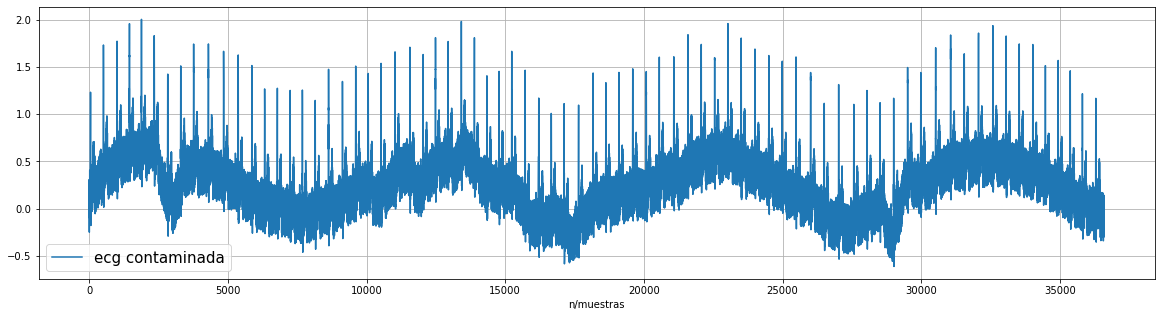

In [219]:
ECG2 = np.loadtxt('ECG2_new.txt')
n1d = np.arange (len(ECG2))

plt.figure(figsize=(20,5))
plt.plot(n1d,ECG2,label="ecg contaminada")
plt.xlabel ("n/muestras")
plt.legend (fontsize=15)
plt.grid (True)
plt.show()

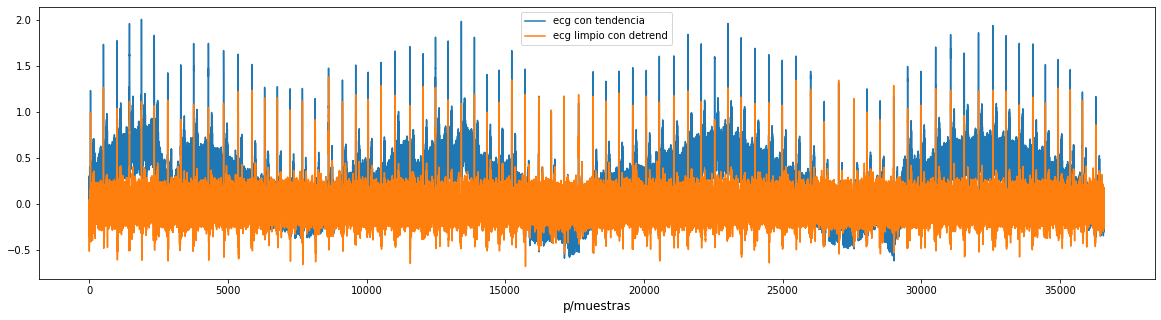

In [220]:
N1_d = len (n1d)
Ad = np.arange(0,N1_d,110) #arreglo
Bd = tuple(Ad) #tupla
y1d = signal.detrend(ECG2,bp=Ad)

plt.figure(figsize=(20,5))
plt.plot(n1d,ECG2,label='ecg con tendencia')
plt.plot(n1d,y1d,label='ecg limpio con detrend')
plt.legend()
plt.xlabel('p/muestras',fontsize=12)
plt.show()

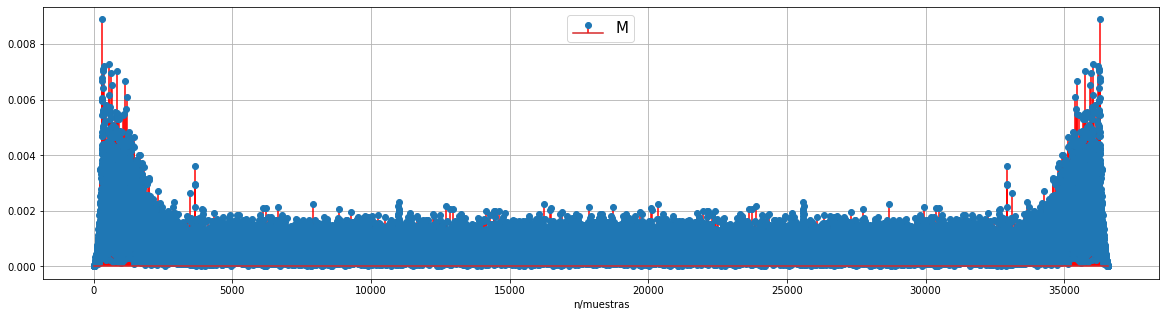

In [227]:
#Calculamos el espectro
esp_d = fft (y1d) / len (y1d)
p_d = np.arange (len(n1d))

plt.figure(figsize=(20,5))
plt.stem(p_d, np.abs(esp_d),"red")
plt.legend ("Módulo del espectro", fontsize=15)
plt.xlabel ("n/muestras")
#plt.ylim ([0,0.05])
#plt.xlim (100,1000)
plt.grid (True)
plt.show()

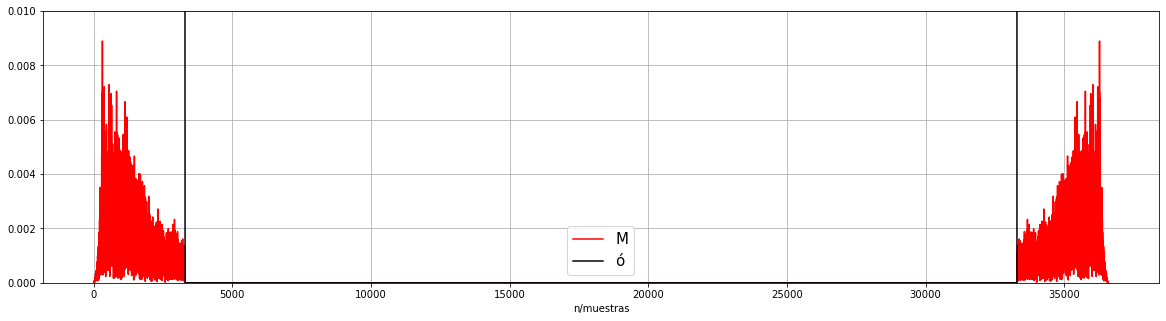

In [261]:
N1_d = len (n1d)

ventana = np.piecewise(p_d, [abs(p_d-N1_d/2)>15000],[lambda p_d: 1, lambda p_d: 0])

espectroFiltrado_d = np.copy (esp_d)
esp_filt_d = espectroFiltrado_d * ventana



plt.figure(figsize=(20,5))
plt.plot(p_d, np.abs(esp_filt_d),"red")
plt.plot(p_d,ventana,'k')
plt.legend ("Módulo del espectro", fontsize=15)
plt.xlabel ("n/muestras")
plt.ylim ([0,0.010])
#plt.xlim (0,500)
plt.grid (True)
plt.show()

/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


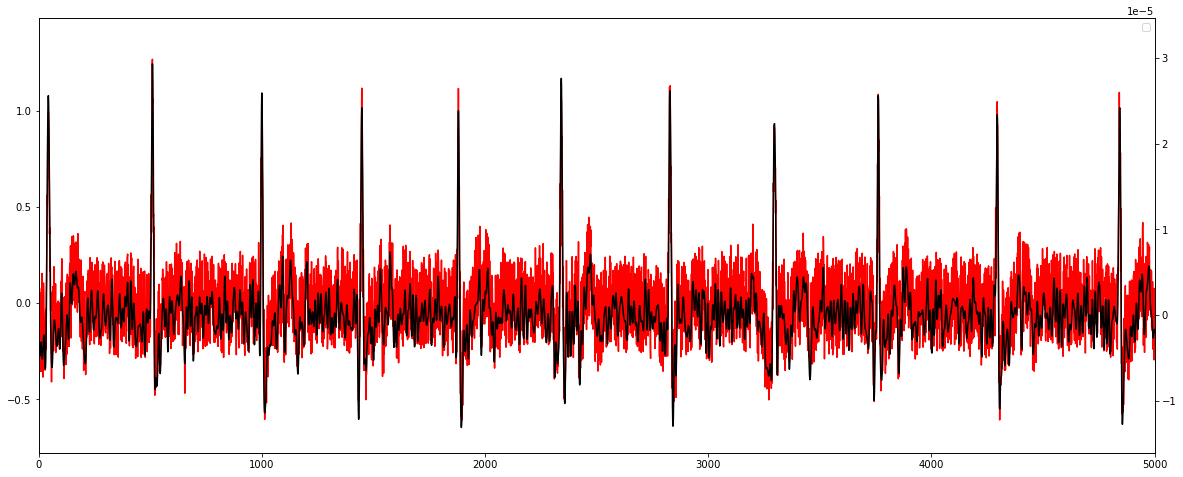

In [260]:
#Reconstruyo la señal
ECG_filtradod = ifft (esp_filt_d)

plt.figure(figsize=(20,8))
plt.plot(n1d,y1d,"r")
plt.twinx()
plt.plot(n1d,ECG_filtradod,"k")
plt.xlabel ("n")
plt.xlim (0,5000)
plt.legend ()
plt.show()

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-24 a la(s) 18.21.54.png">

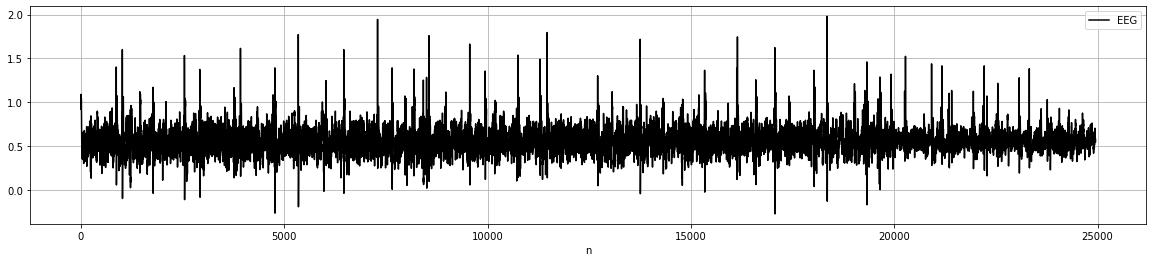

In [43]:
EEG = np.loadtxt ("EEG.txt")
nEEG = np.arange (len(EEG))

plt.figure(figsize=(20,4))
plt.plot(nEEG,EEG,"k",label="EEG")
plt.xlabel ("n")
plt.legend ()
plt.grid (True)
plt.show ()

In [44]:
len (EEG)

24948

In [49]:
#Como hay que divirlo en 5 segmentos uniformemente, utilizo:
EEG2 = EEG [0:20000]

#Calculo del espectro
esp_2 = fft (EEG2) / len (EEG2)
N2 = len (EEG2)
p2 = np.arange (N2)

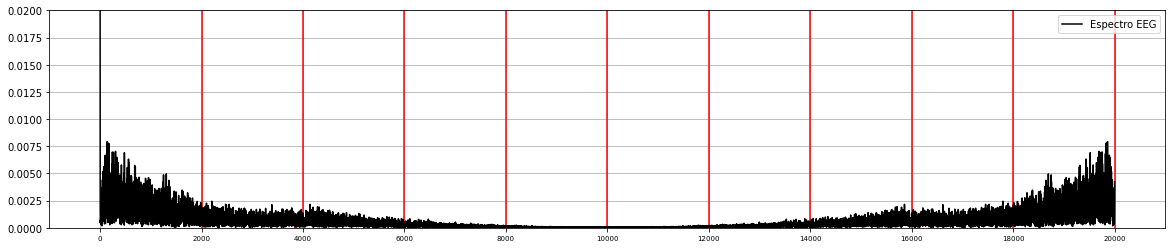

In [50]:
#Grafico el espectro y las bandas creadas para verificar que estén bien

plt.figure(figsize=(20,4))
plt.plot(p2,abs(esp_2),"k",label="Espectro EEG")
plt.vlines (x=[2000,4000,6000,8000,10000,12000,14000,16000,18000,20000], ymin=0 , ymax= max(p2),colors="r")
plt.ylim (0,0.02)
plt.xticks (np.arange (0,20001,2000), fontsize=7)
plt.legend ()
plt.grid (True)
plt.show ()

In [51]:
#Crear las ventanas y dividir el espectro
banda1 = np.piecewise (p2,[np.absolute(p2-N2/2)>8000] , [lambda p2: 1 , lambda p2: 0.002]) #Tomará de 800 a 12000
esp_2_1 = esp_2 * banda1

banda2 = np.piecewise (p2,[(np.absolute(p2-N2/2)<8000)&(np.absolute(p2-N2/2)>6000)] , [lambda p2: 1 , lambda p2: 0.002]) #Tomará de 800 a 12000
esp_2_2 = esp_2 * banda2

banda3 = np.piecewise (p2,[(np.absolute(p2-N2/2)<6000)&(np.absolute(p2-N2/2)>4000)] , [lambda p2: 1 , lambda p2: 0.002]) #Tomará de 800 a 12000
esp_2_3 = esp_2 * banda3

banda4 = np.piecewise (p2,[(np.absolute(p2-N2/2)<4000)&(np.absolute(p2-N2/2)>2000)] , [lambda p2: 1 , lambda p2: 0.002]) #Tomará de 800 a 12000
esp_2_4 = esp_2 * banda4

banda5 = np.piecewise (p2,[np.absolute(p2-N2/2)<2000] , [lambda p2: 1 , lambda p2: 0.002]) #Tomará de 800 a 12000
esp_2_5 = esp_2 * banda5

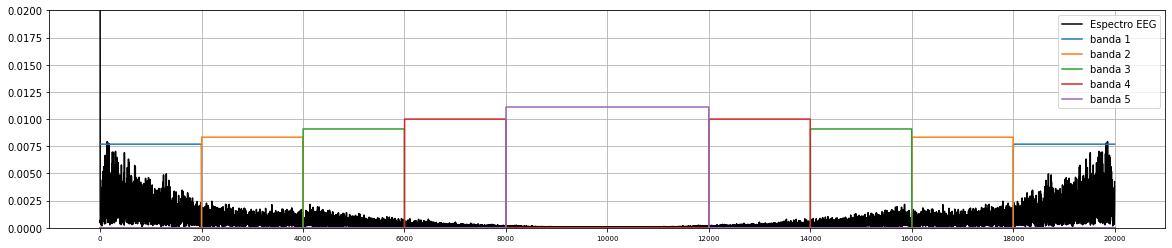

In [52]:
plt.figure(figsize=(20,4))
plt.plot(p2,abs(esp_2),"k",label="Espectro EEG")
plt.plot (p2,banda1/130,label="banda 1")
plt.plot (p2,banda2/120,label="banda 2")
plt.plot (p2,banda3/110,label="banda 3")
plt.plot (p2,banda4/100,label="banda 4")
plt.plot (p2,banda5/90,label="banda 5")
plt.ylim (0,0.02)
plt.xticks (np.arange (0,20001,2000), fontsize=7)
plt.legend ()
plt.grid (True)
plt.show ()

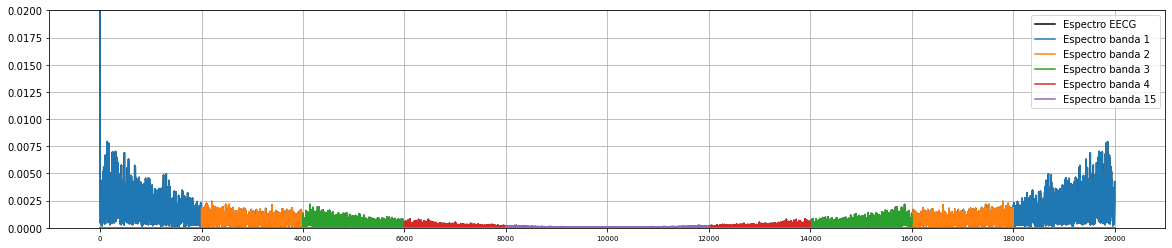

In [54]:
plt.figure(figsize=(20,4))
plt.plot(p2,abs(esp_2),"k",label="Espectro EECG")
plt.plot(p2,abs(esp_2_1),label="Espectro banda 1")
plt.plot(p2,abs(esp_2_2),label="Espectro banda 2")
plt.plot(p2,abs(esp_2_3),label="Espectro banda 3")
plt.plot(p2,abs(esp_2_4),label="Espectro banda 4")
plt.plot(p2,abs(esp_2_5),label="Espectro banda 15")
plt.ylim (0,0.02)
plt.xticks (np.arange (0,20001,2000), fontsize=7)
plt.legend ()
plt.grid (True)
plt.show ()

In [103]:
# Transformada inversa para recuperar las señales
signal1 = ifft (esp_2_1)
signal2 = ifft (esp_2_2)
signal3 = ifft (esp_2_3)
signal4 = ifft (esp_2_4)
signal5 = ifft (esp_2_5)

/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting c

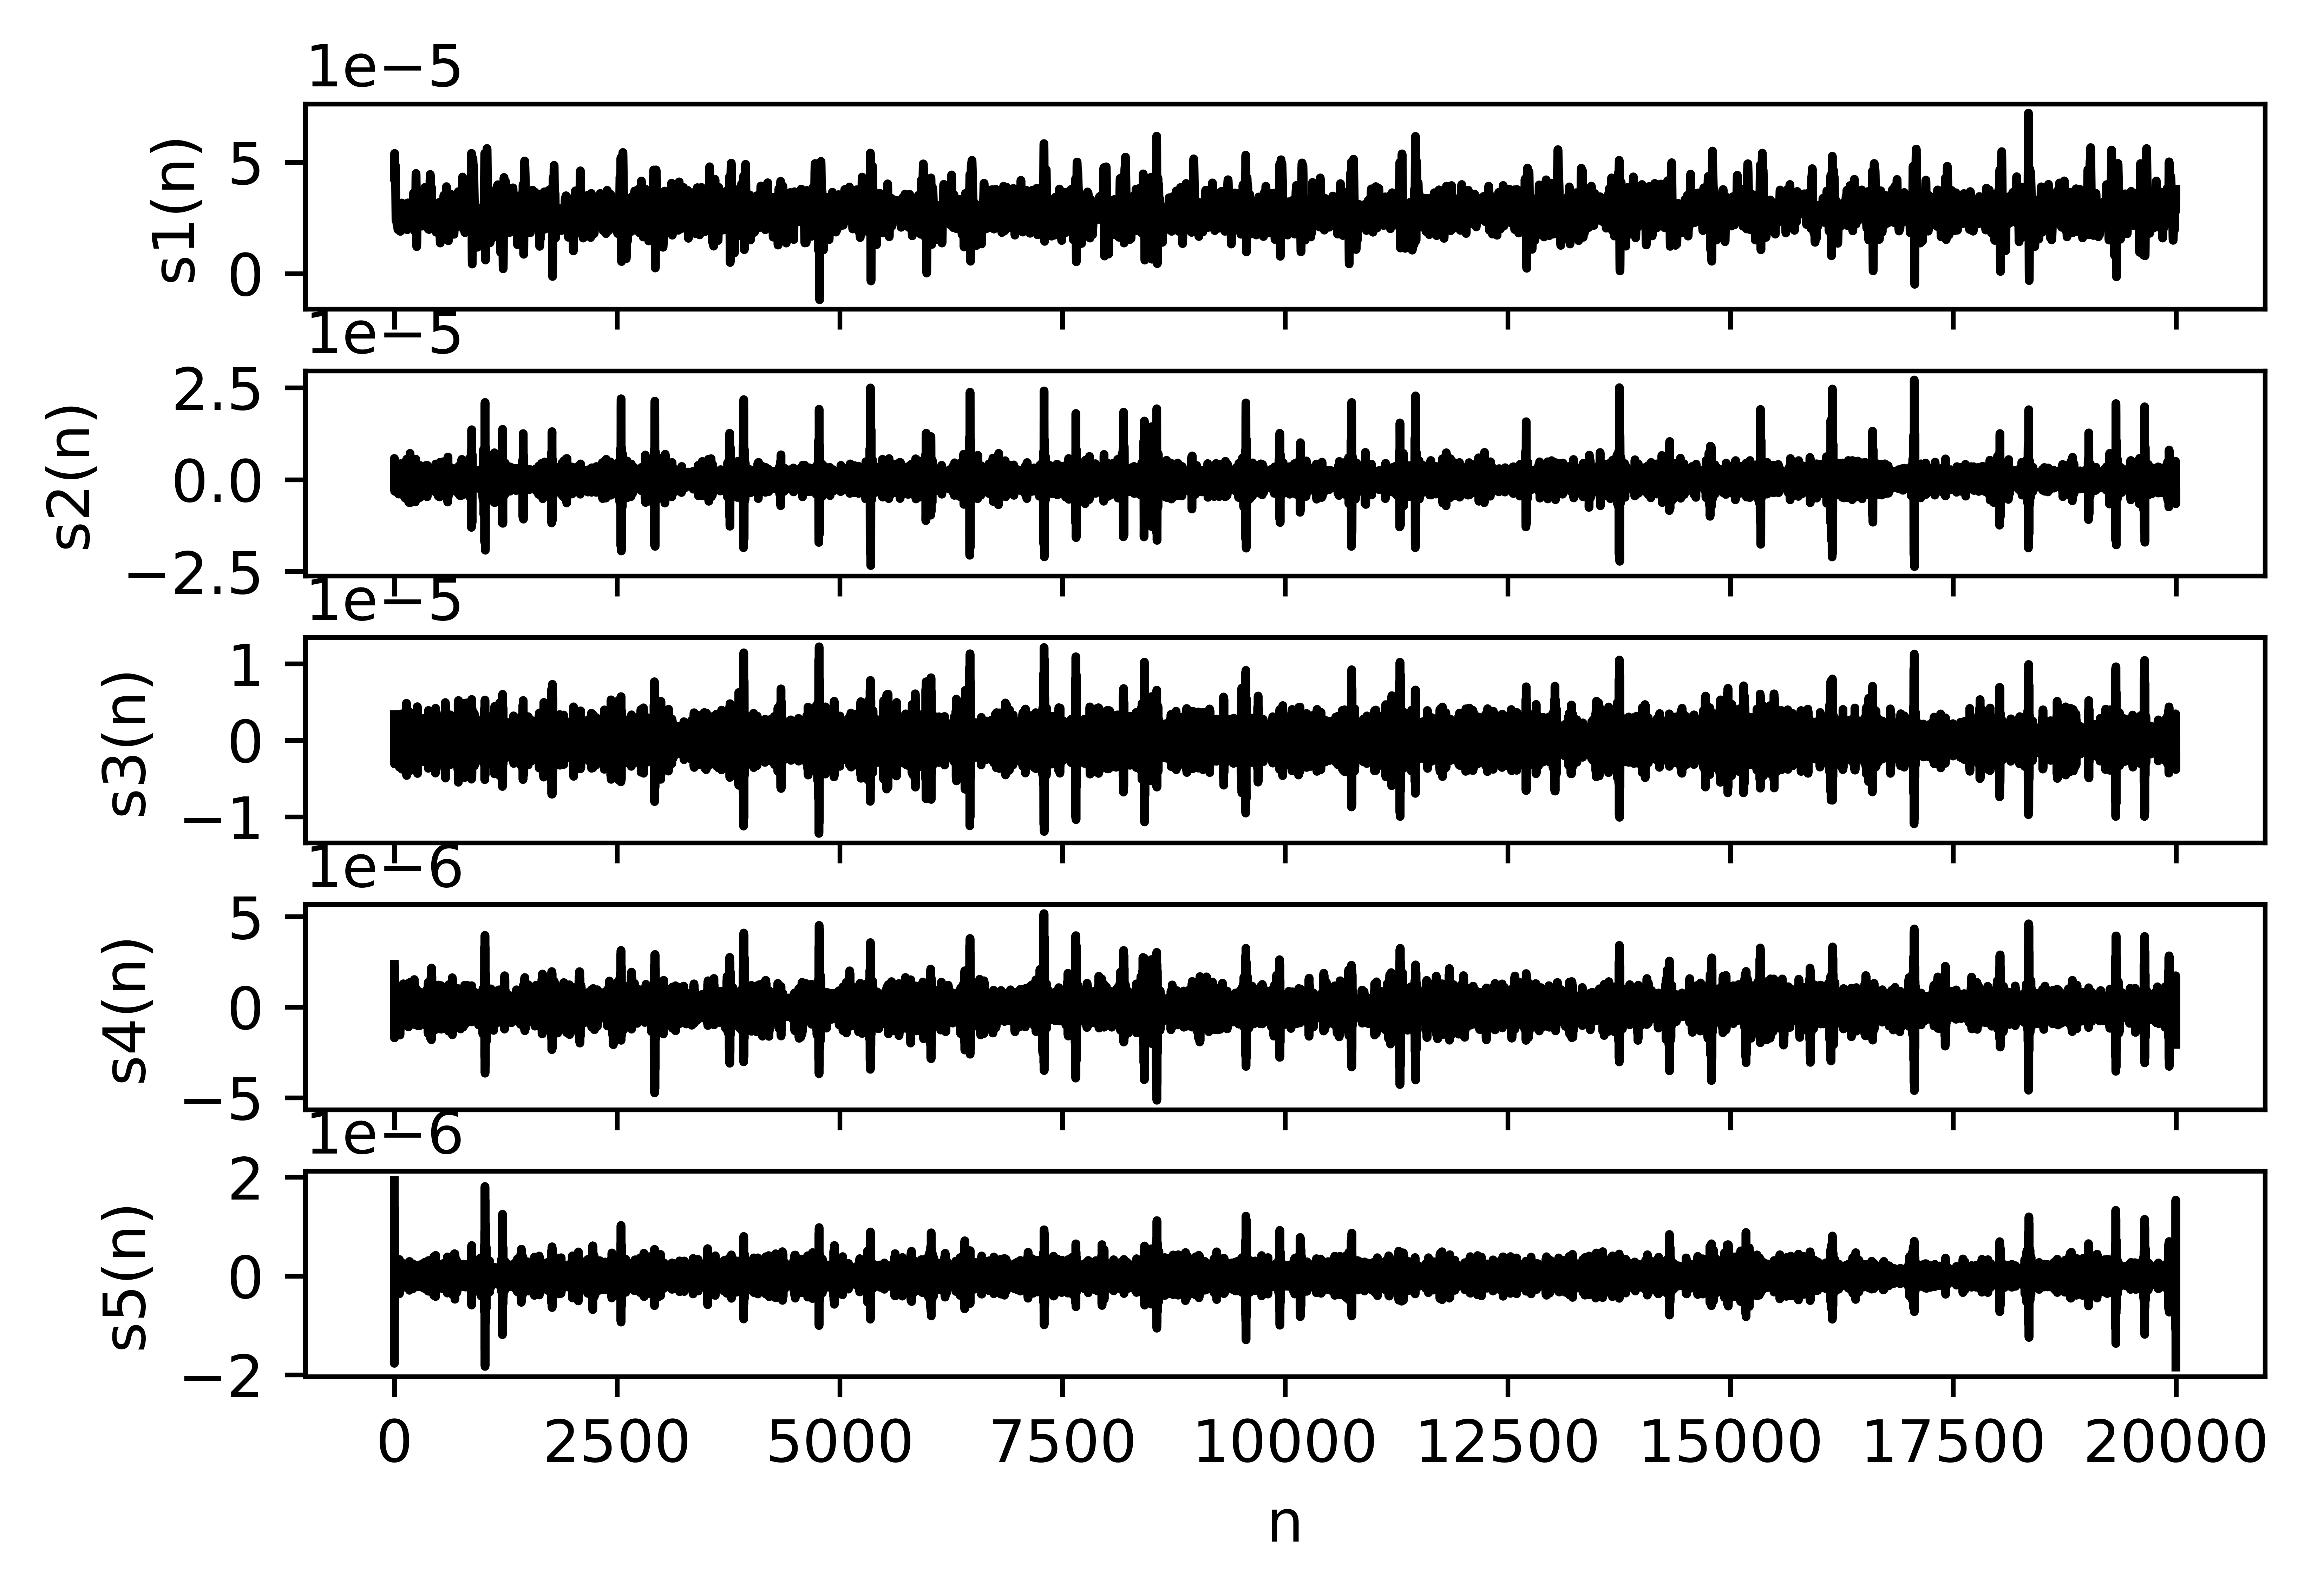

In [108]:
plt.fig, plt.axs = plt.subplots(5,dpi=1200,sharex="col",gridspec_kw={"hspace":0.3})
#plt.fig.subtitle ("Ej 2 - TP7",fontsize=14)
plt.axs[0].plot(p2,signal1,"k")
plt.axs[0].set(ylabel="s1(n)")
plt.axs[1].plot(p2,signal2,"k")
plt.axs[1].set(ylabel="s2(n)")
plt.axs[2].plot(p2,signal3,"k")
plt.axs[2].set(ylabel="s3(n)")
plt.axs[3].plot(p2,signal4,"k")
plt.axs[3].set(ylabel="s4(n)")
plt.axs[4].plot(p2,signal5,"k")
plt.axs[4].set(ylabel="s5(n)")
plt.axs[4].set(xlabel="n")
plt.show()

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-24 a la(s) 18.23.50.png">

## Apartado A

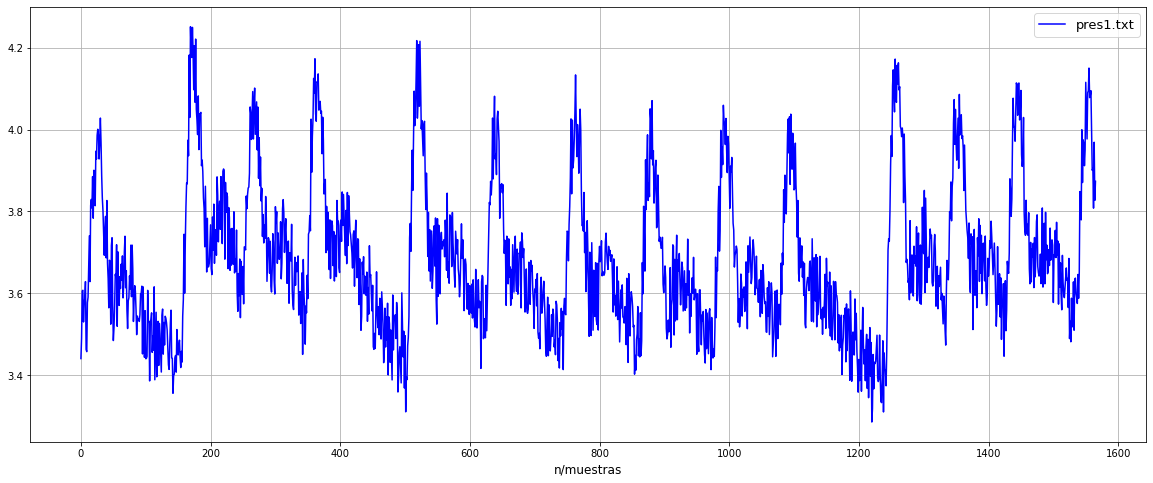

In [109]:
P3 = np.loadtxt ("pres1.txt")
P3 = P3[:,0]
n3 = np.arange (len(P3))
N3 = len (n3)

plt.figure(figsize=(20,8))
plt.plot(n3, P3,label='pres1.txt',color="b")
plt.xlabel('n/muestras',fontsize=12)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

In [121]:
orden = np.array ([2,3,4,5,6,7,8,9,10])
P_filt = np.zeros ([len(P3),len(orden)])

for i,N3 in enumerate (orden):
    P_filt [:,i] = np.convolve (P3,np.ones(N3)/N3,mode="same")

P_filt.shape

(1566, 9)

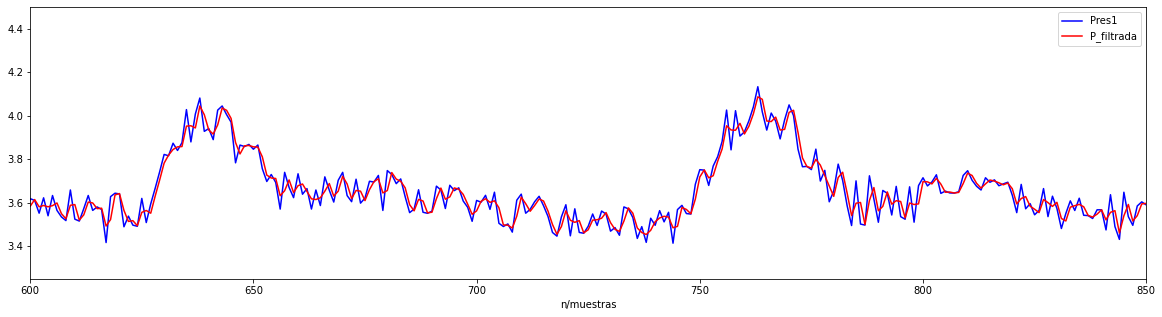

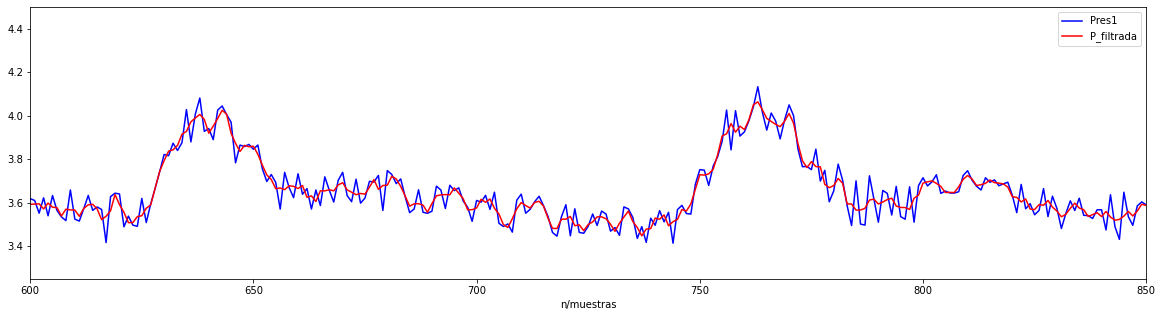

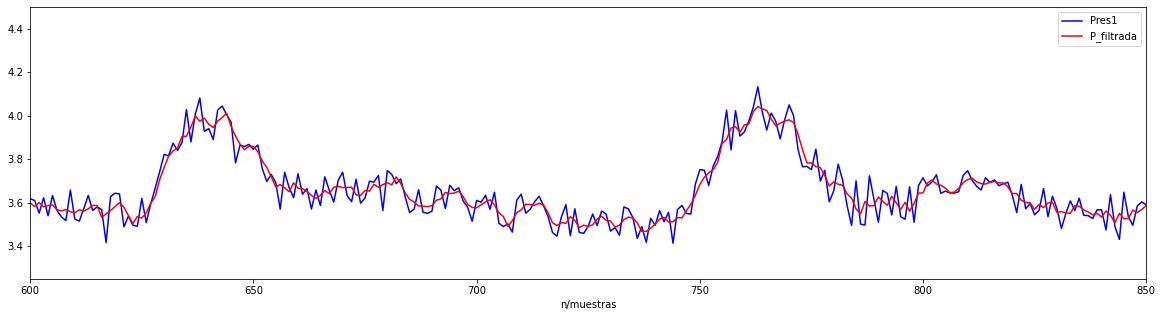

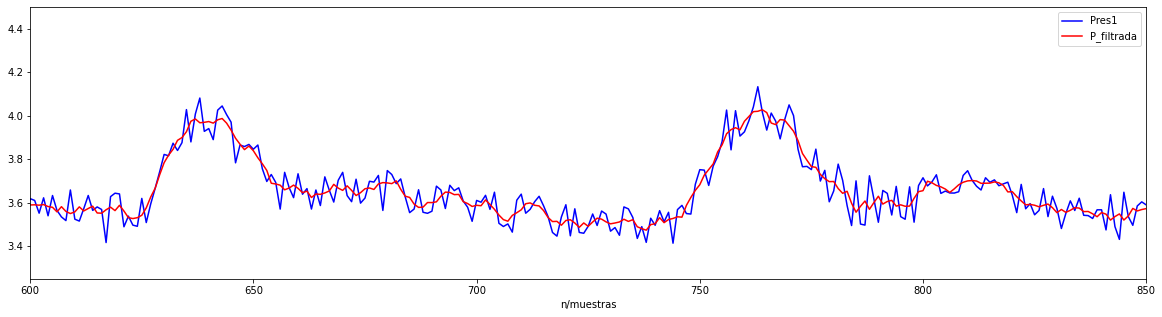

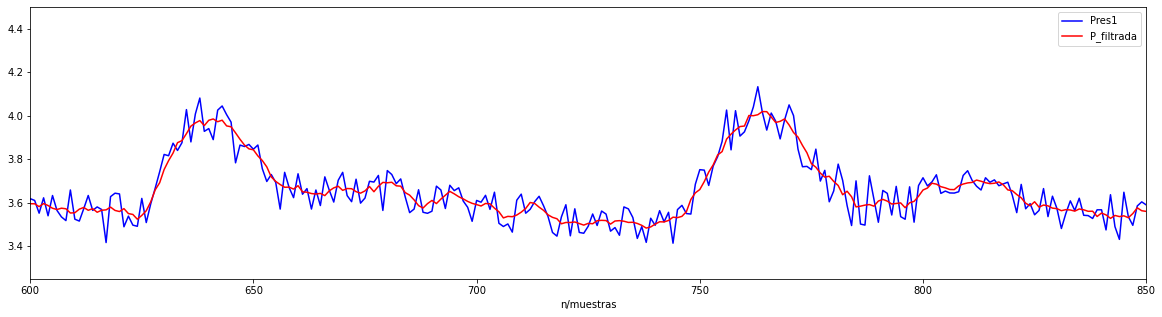

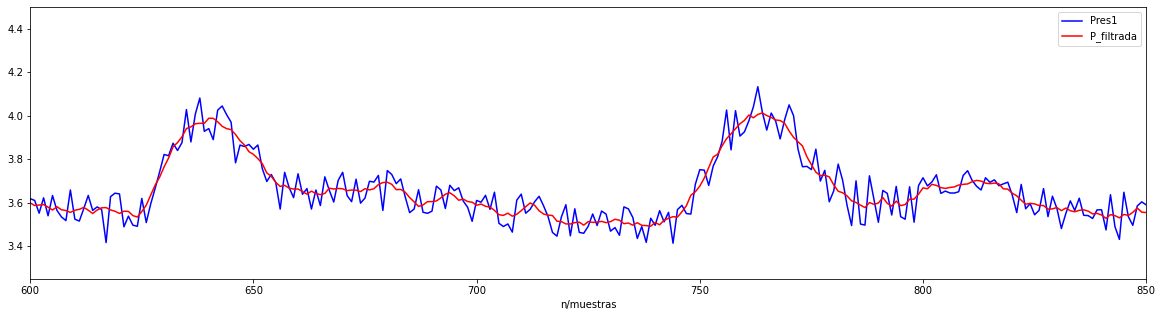

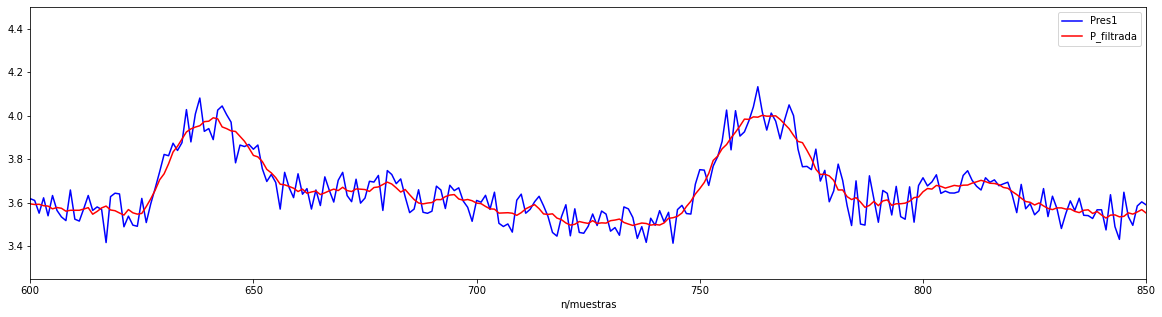

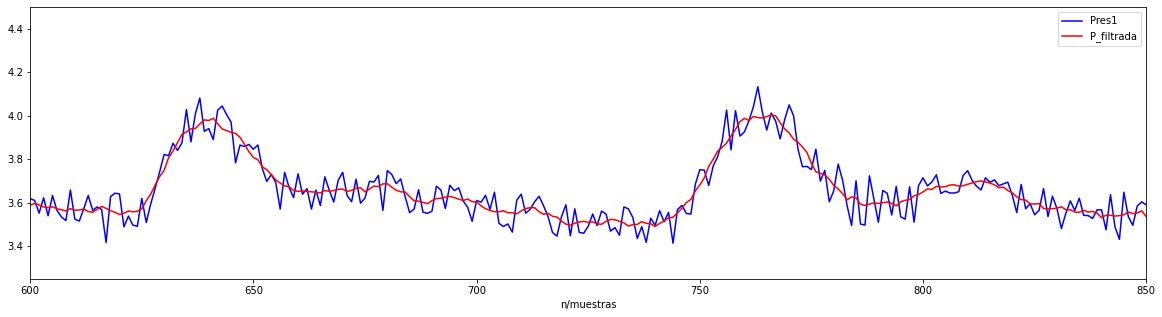

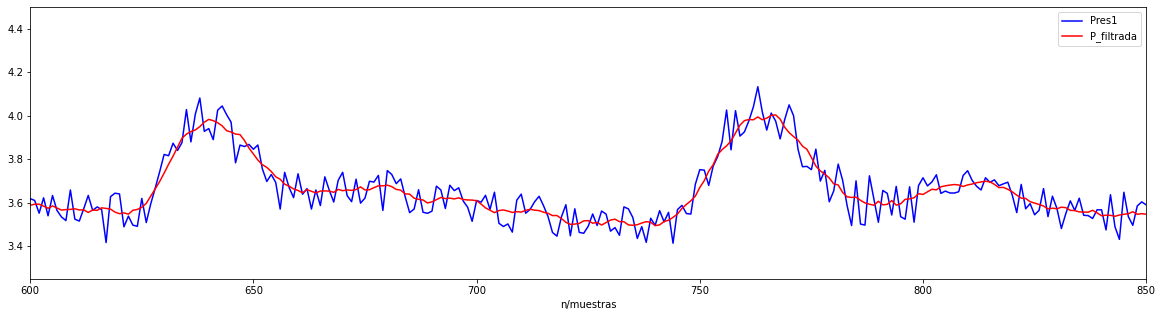

In [114]:
for i,N3 in enumerate(orden):
    plt.figure (figsize=(20,5))
    plt.plot(n3,P3,"b")
    plt.plot (n3,P_filt[:,i],"r")
    plt.ylim([3.25,4.5])
    plt.xlim([600,850])
    plt.xlabel ("n/muestras")
    plt.legend (("Pres1","P_filtrada"))

In [124]:
max_signal = np.zeros(len(orden))
min_signal = np.zeros(len(orden))
max_noise = np.zeros(len(orden))
min_noise = np.zeros(len(orden))

for i,N3 in enumerate (orden):
    max_signal [i] = np.max (P_filt[720:800,i])
    min_signal [i]= np.min (P_filt[720:800,i])
    max_noise [i] = np.max (P_filt[720:740,i])
    min_noise [i]= np.min (P_filt[720:740,i])

In [125]:
signal_pp = max_signal - min_signal
noise_pp = max_noise - min_noise

SNR = 20*np.log(signal_pp / noise_pp)
SNR

array([32.87643142, 33.81605627, 42.03448757, 46.11173481, 54.24393089,
       55.87421995, 56.93860461, 56.26936787, 57.96357506])

## Apartado B

No handles with labels found to put in legend.


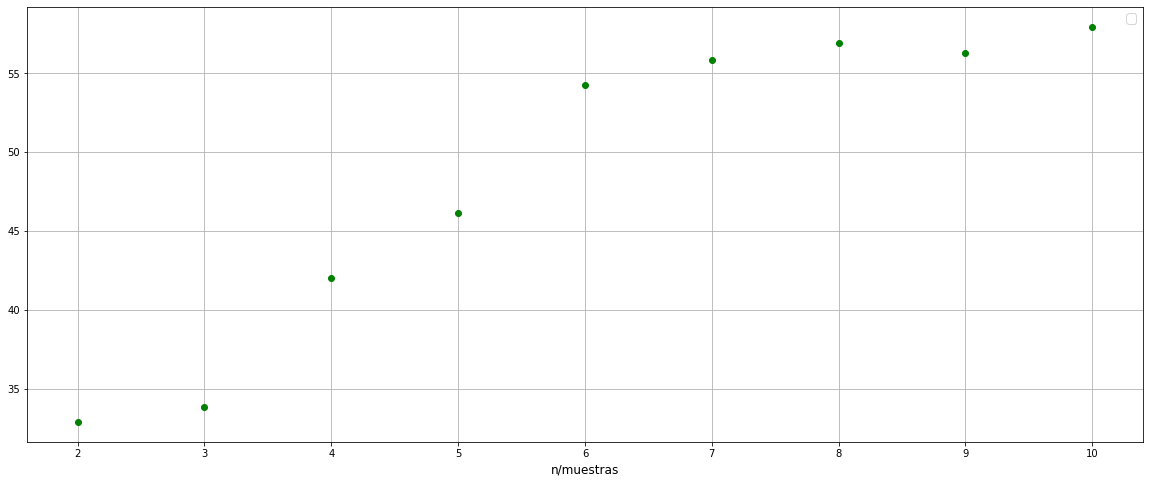

In [128]:
plt.figure(figsize=(20,8))
plt.plot(orden, SNR,"go")
plt.xlabel('n/muestras',fontsize=12)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

- - -

In [264]:
M3 = np.arange (2,11) #vector de ordenes de los FPM
k3 = np.arange (0,60,dtype=np.float64)
resp3 = np.empty ((len(P3),len(M3)))
for i,N3 in enumerate (M3):
    FPM = np.piecewise (k3,(0<=k3)&(k3<=N3-1),[1/N3,0])
    resp3[:,i] = np.convolve (P3,FPM,"same")

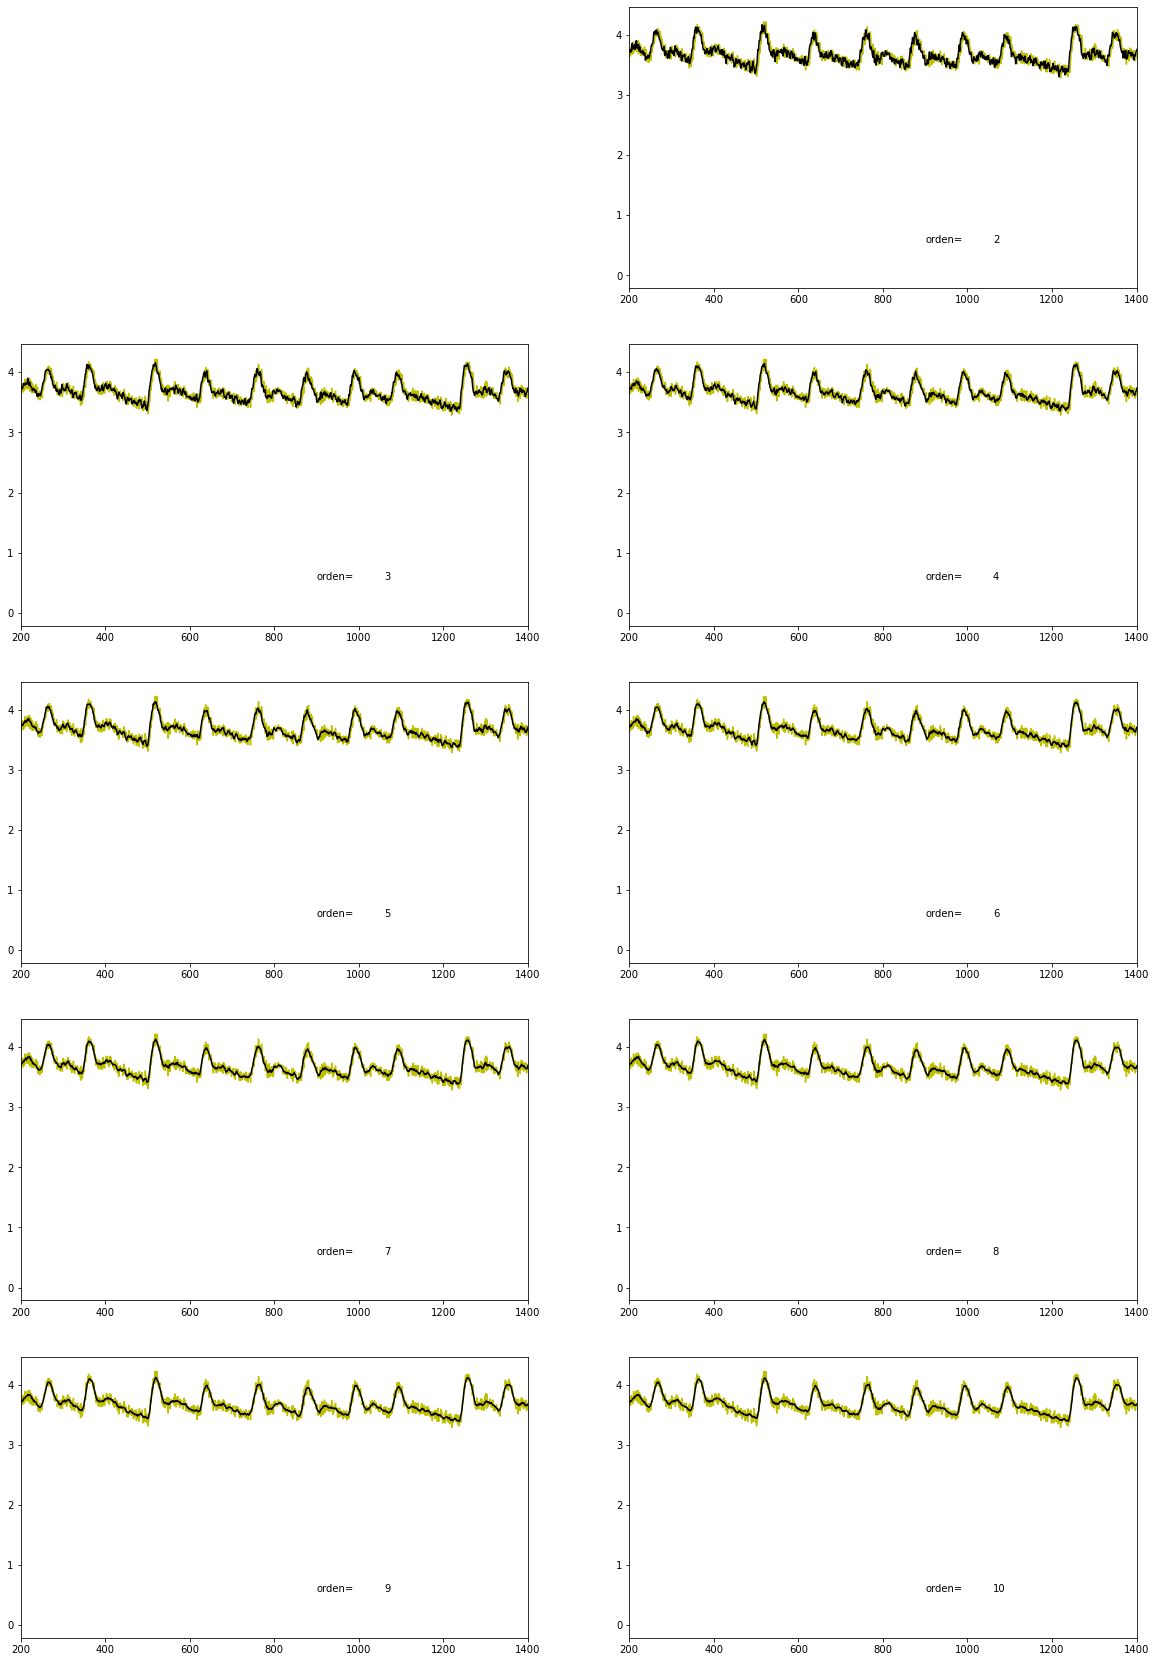

In [267]:
plt.figure(figsize=(20,30))
for i,j in enumerate (M3):
    plt.subplot (5,2,j)
    plt.plot(n3, P3,color="y")
    plt.plot(n3+25, resp3[:,i],color="k")
    plt.text (900,0.55,s="orden=")
    plt.text (1060,0.55,s=j)
    plt.xlim (200,1400)
plt.show()

- - -

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-24 a la(s) 18.24.01.png">

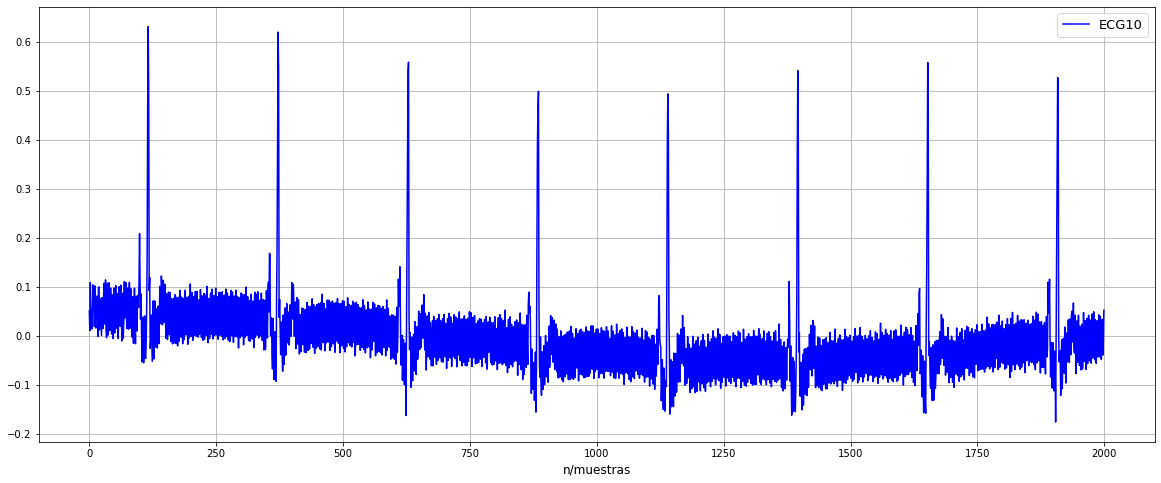

In [62]:
ecg10 = np.loadtxt ("ECG10.txt")
N = len(ecg10) ; n1 = np.arange (N)

plt.figure(figsize=(20,8))
plt.plot(n1, ecg10,label='ECG10',color="b")
plt.xlabel('n/muestras',fontsize=12)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

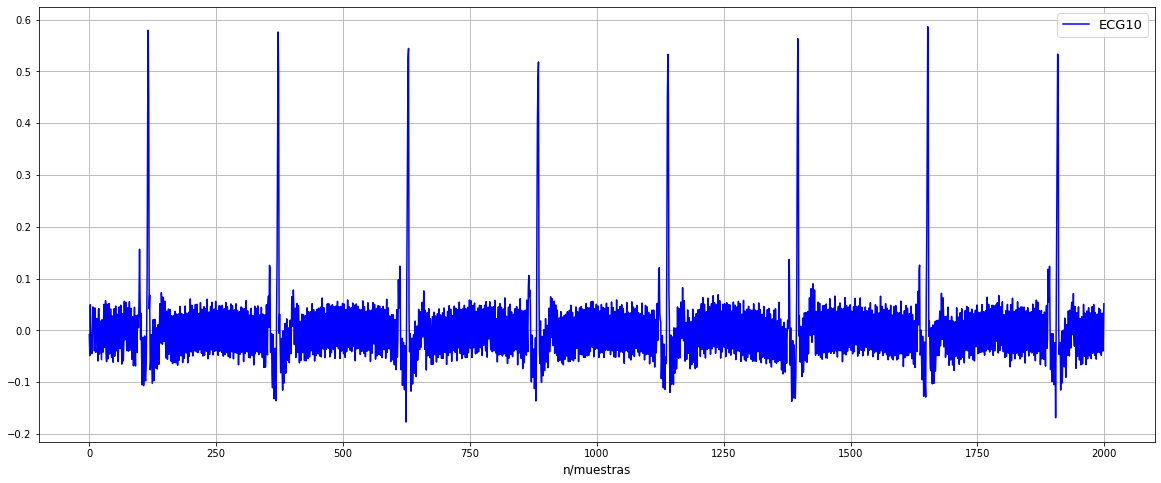

In [63]:
A = np.arange (0,N,200) ; B = tuple (A)
y10 = signal.detrend (ecg10,bp=A) #elimino tendencia

plt.figure(figsize=(20,8))
plt.plot(n1, y10,label='ECG10',color="b")
plt.xlabel('n/muestras',fontsize=12)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

In [82]:
M = np.arange (1,11) #vector de ordenes de los FPM
k = np.arange (0,20,dtype=np.float64)
resp = np.empty ((N,len(M)))
for i,N1 in enumerate (M):
    FPM = np.piecewise (k,(0<=k)&(k<=N1-1),[1/N1,0])
    resp[:,i] = np.convolve (y10,FPM,"same")

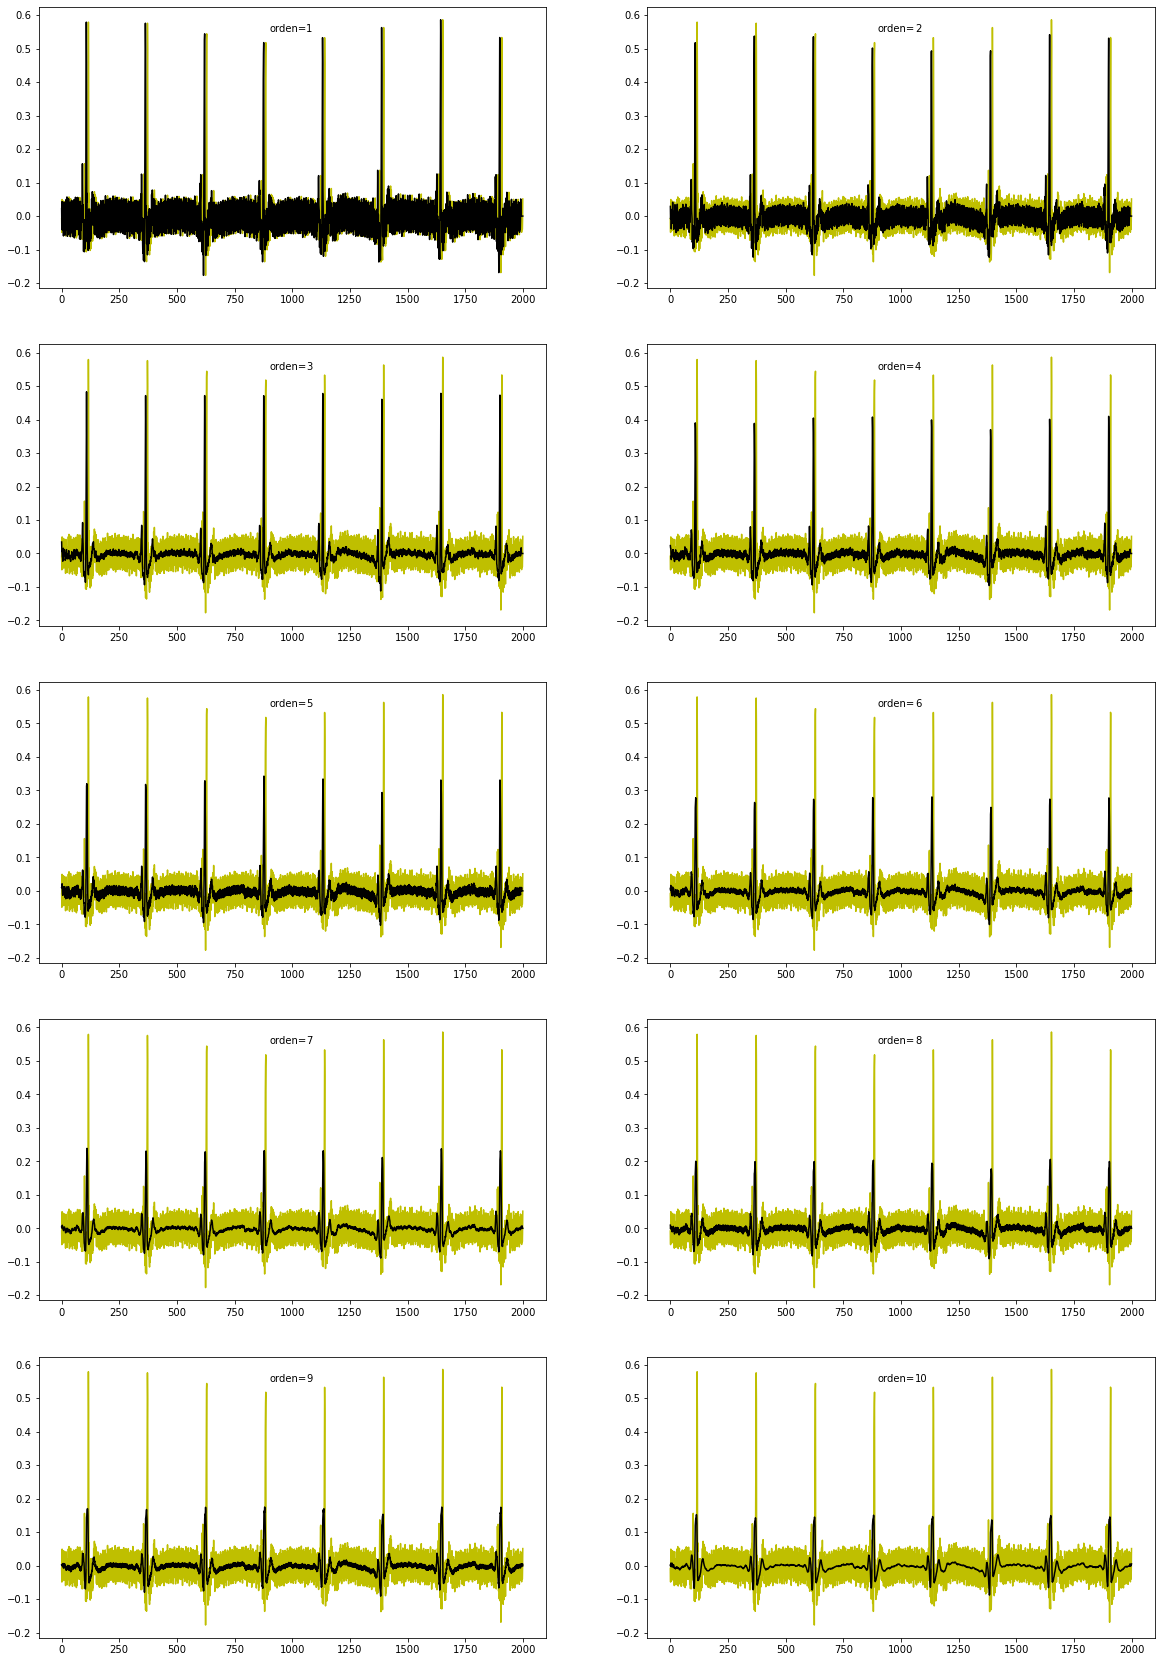

In [83]:
plt.figure(figsize=(20,30))
for i,j in enumerate (M):
    plt.subplot (5,2,j)
    plt.plot(n1, y10,color="y")
    plt.plot(n1, resp[:,i],color="k")
    plt.text (900,0.55,s="orden=")
    plt.text (1060,0.55,s=j)
plt.show()

In [84]:
from scipy.signal import find_peaks

In [85]:
peaks_max = find_peaks (y10,distance=150)[0]
peaks_max

array([ 116,  372,  629,  885, 1140, 1396, 1652, 1908])

In [87]:
peaks_min = find_peaks (-y10,distance=150)[0]
peaks_min

array([ 107,  368,  624,  880, 1144, 1384, 1648, 1904])

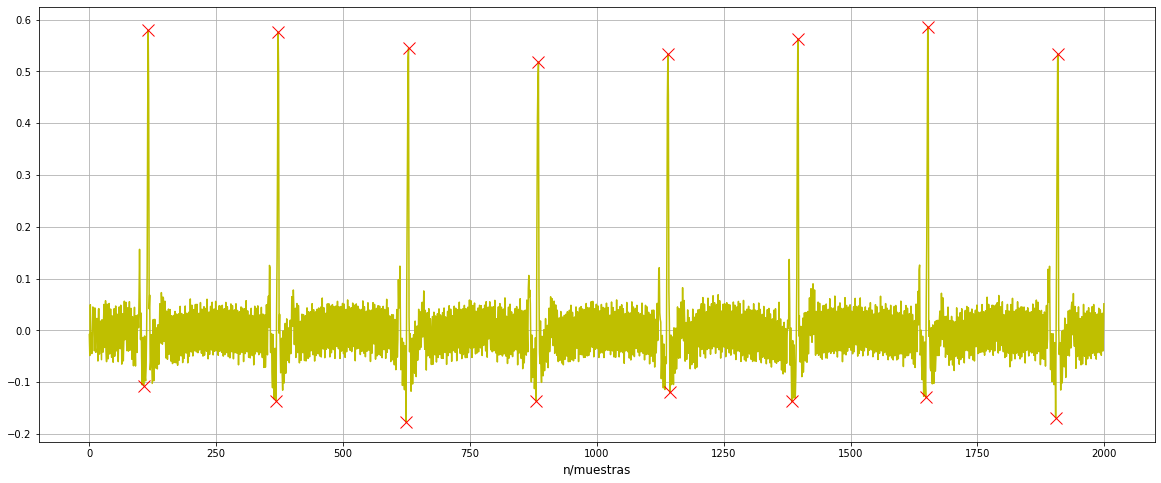

In [90]:
plt.figure(figsize=(20,8))
plt.plot(n1, y10,label='y10',color="y")
plt.plot(peaks_max, y10[peaks_max],"x",color="r",ms=12)
plt.plot(peaks_min, y10[peaks_min],"x",color="r",ms=12)
plt.xlabel('n/muestras',fontsize=12)
plt.grid(True)
plt.show()

In [202]:
preaks_mas = find_peaks (y10,distance=150)[0] ; peaks_min = find_peaks (-y10,distance=150)[0]
A_max_signal = np.mean (y10[peaks_max]) ; A_min_signal = np.mean (y10[peaks_min])
aux_max = np.zeros ((len(M),len(peaks_max))) ; aux_min = np.zeros ((len(M),len(peaks_min))) 
for i,value in enumerate (M):
    peaks2_max = find_peaks (resp[:,i],distance=150)[0]
    peaks2_min = find_peaks (-resp[:,i],distance=150)[0]
    aux_max [i,:] = resp [peaks2_max,i]
    aux_min [i,:] = resp [peaks2_min,i]
A_max = np.mean (aux_max,axis=1) ; A_min = np.mean (aux_min,axis=1)
A_signal = A_max_signal - A_min_signal ; A_signal_filtr = A_max - A_min
Atenuac = np.round ((A_signal - A_signal_filtr)*100/A_signal,1) #porcentaje de atencuación

In [206]:
max_noise = np.zeros (len(M)) ; min_noise = np.zeros (len(M))
for i in range (len(M)):
    max_noise[i] = max(resp[400:600,i]) #ruido uniforme en toda la señal
    min_noise[i] = min(resp[400:600,i])

In [207]:
A_noise = max_noise - min_noise
SNR = A_signal_filtr / A_noise
SNR_dB = 20*np.log (A_signal_filtr/A_noise)

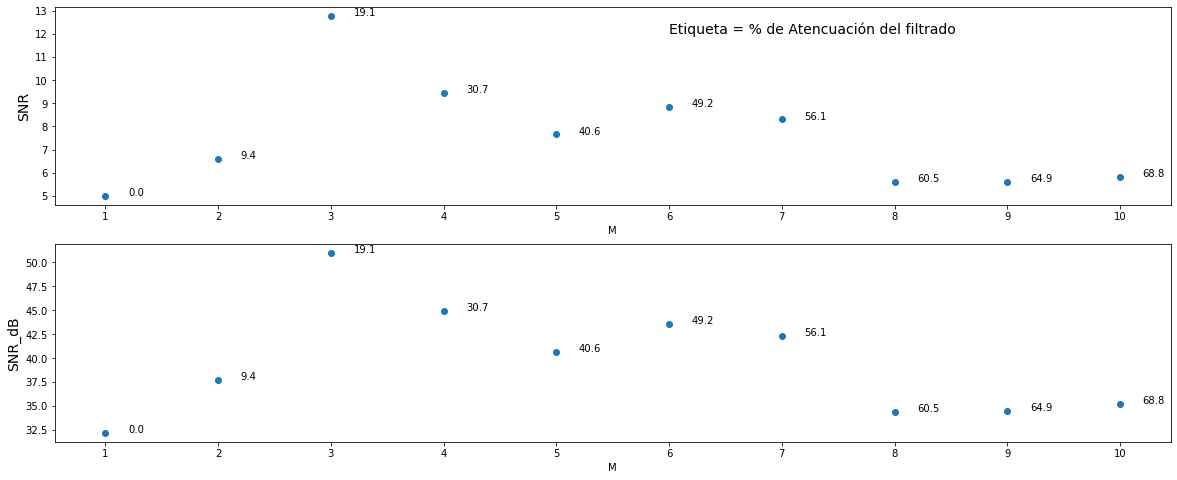

In [208]:
plt.figure (figsize=(20,8))
plt.subplot (2,1,1)
plt.plot (M,SNR,"o")
for i,label in enumerate (Atenuac):
    plt.annotate (label, (M[i] + 0.2, SNR[i]))
plt.ylabel ("SNR",fontsize=14)
plt.xlabel ("M")
plt.xticks(M)
plt.text (6,12,"Etiqueta = % de Atencuación del filtrado",fontsize=14)
plt.subplot (2,1,2)
plt.plot (M,SNR_dB,"o")
for i,label in enumerate (Atenuac):
    plt.annotate (label, (M[i] + 0.2, SNR_dB[i]))
plt.ylabel ("SNR_dB",fontsize=14)
plt.xlabel ("M")
plt.xticks(M)
plt.show()

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-24 a la(s) 18.24.12.png">

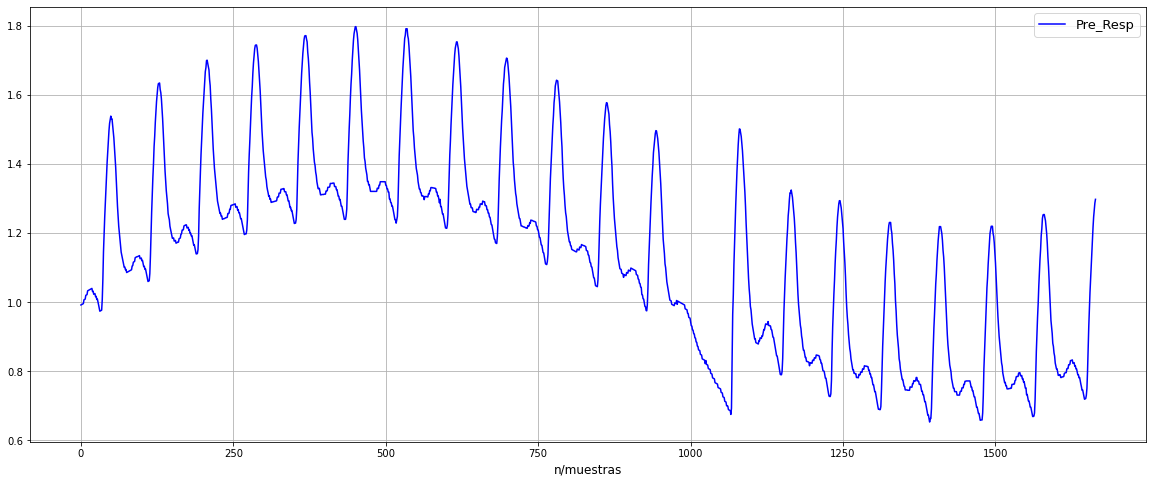

In [129]:
señal5 = pd.read_excel ("Pre_Resp.xlsx",header=0)
Pre_Resp = señal5.to_numpy()
n5 = np.arange(len(Pre_Resp))


plt.figure(figsize=(20,8))
plt.plot(n5, Pre_Resp,label='Pre_Resp',color="b")
plt.xlabel('n/muestras',fontsize=12)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

In [130]:
Pre_Resp.shape

(1665, 1)

In [131]:
Pre_Resp = np.reshape (Pre_Resp,(1,len(Pre_Resp)))[0]
Pre_Resp

array([0.992, 0.993, 0.994, ..., 1.268, 1.287, 1.298])

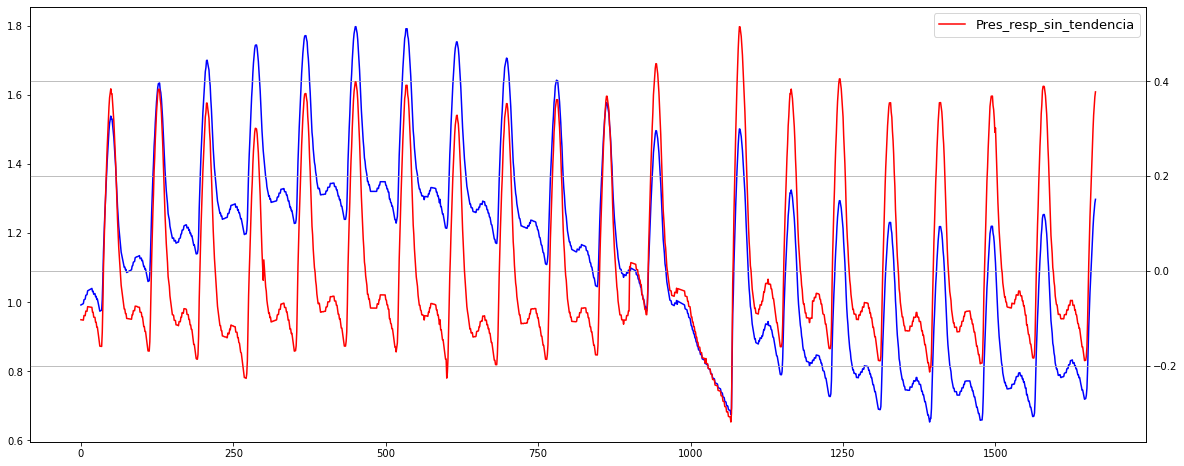

In [134]:
A5 = np.arange (0,len(Pre_Resp),300) ; B5 = tuple (A5)
y5 = signal.detrend (Pre_Resp,bp=A5) #elimino tendencia

plt.figure(figsize=(20,8))
plt.plot(n5, Pre_Resp,label='Pre_Resp',color="b")
plt.twinx()
plt.plot(n5, y5,label='Pres_resp_sin_tendencia',color="r")
plt.xlabel('n/muestras',fontsize=12)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-24 a la(s) 18.24.19.png">

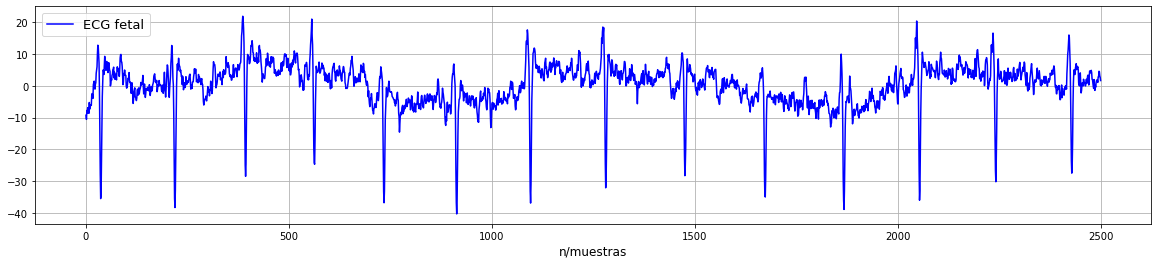

In [195]:
ECGfetal = np.loadtxt ("ECGfetal.txt")
N6 = len(ECGfetal) ; n6 = np.arange (N6)

plt.figure(figsize=(20,4))
plt.plot(n6, ECGfetal,label='ECG fetal',color="b")
plt.xlabel('n/muestras',fontsize=12)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

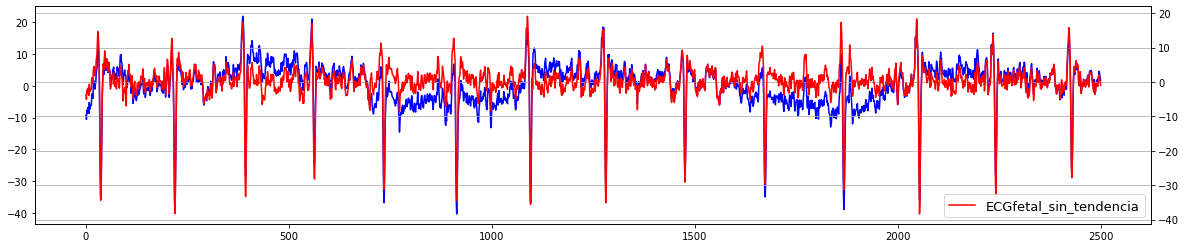

In [197]:
A6 = np.arange (0,len(ECGfetal),100) ; B6 = tuple (A6)
y6 = signal.detrend (ECGfetal,bp=A6) #elimino tendencia

plt.figure(figsize=(20,4))
plt.plot(n6, ECGfetal,label='ECGfetal',color="b")
plt.twinx()
plt.plot(n6, y6,label='ECGfetal_sin_tendencia',color="r")
plt.xlabel('n/muestras',fontsize=12)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

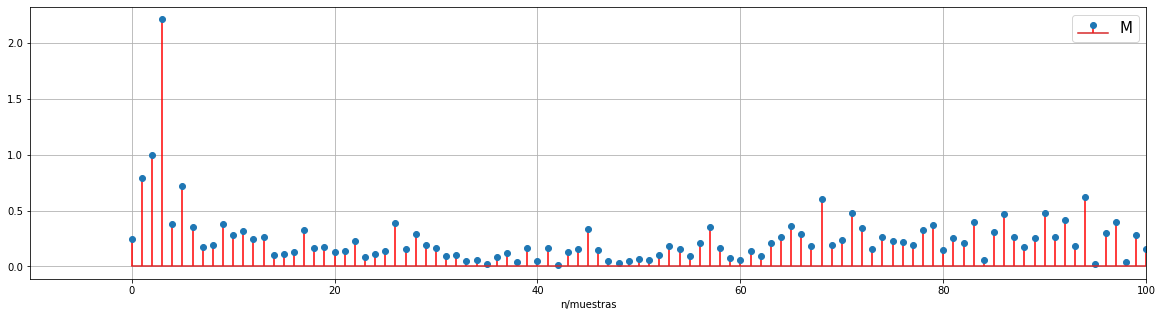

In [198]:
esp_6 = fft (ECGfetal) / len (ECGfetal) #normalizado
p6 = np.arange (len(n6))

plt.figure(figsize=(20,5))
plt.stem(p6, abs(esp_6),"red")
plt.grid (True)
plt.legend ("Módulo del espectro", fontsize=15)
plt.xlabel ("n/muestras")
#plt.ylim (0,0.04)
plt.xlim (-10,100)
plt.show()

In [199]:
esp_6c = np.copy (esp_6)
N6 = len(n6)

esp_6c [2] = 1e-5
esp_6c [3] = 1e-5
esp_6c [1] = 1e-5
esp_6c [5] = 1e-5
esp_6c [N6-2] = 1e-5
esp_6c [N6-3] = 1e-5
esp_6c [N6-1] = 1e-5
esp_6c [N6-5] = 1e-5

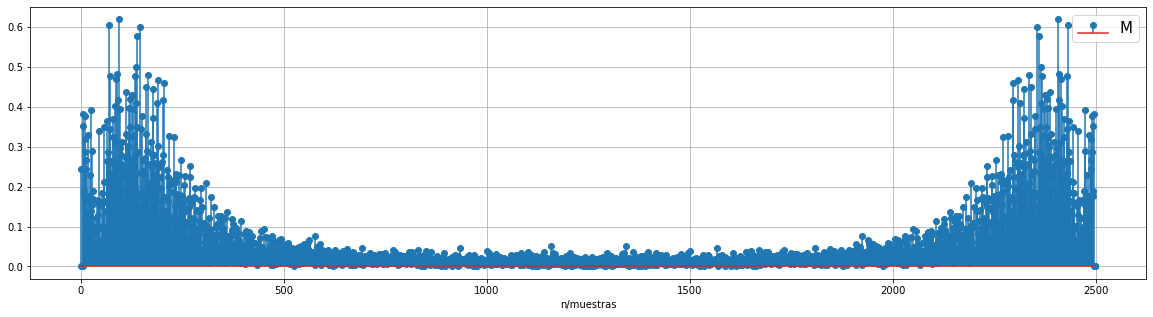

In [200]:
plt.figure(figsize=(20,5))
plt.stem(p6, abs(esp_6c),)
plt.grid (True)
plt.legend ("Módulo del espectro", fontsize=15)
plt.xlabel ("n/muestras")
#plt.ylim (0,0.04)
#plt.xlim (-10,100)
plt.show()

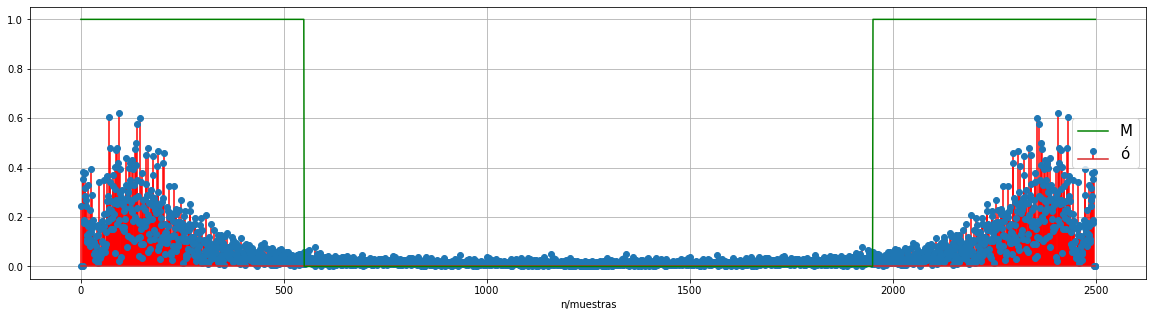

In [181]:
esp_fil6 = np.piecewise (p6, [np.absolute (p6-N6/2) > 700], [lambda pb1: 1, lambda pb1: 0.0005])


plt.figure(figsize=(20,5))
plt.stem(p6, abs(esp_6c),"red")
plt.plot (p6,abs(esp_fil6),color="green",label="y")
plt.grid (True)
plt.legend ("Módulo del espectro", fontsize=15)
plt.xlabel ("n/muestras")
plt.show()

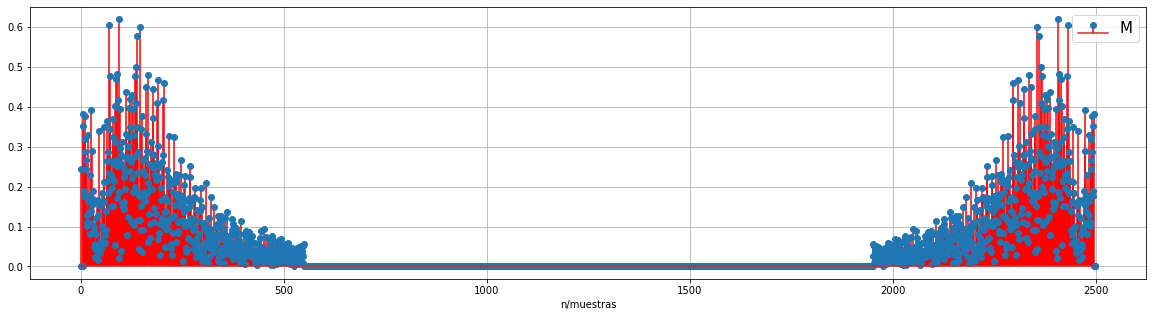

In [182]:
esp_bfill6 = esp_6c * esp_fil6

plt.figure(figsize=(20,5))
plt.stem(p6, abs(esp_bfill6),"red")
plt.grid (True)
plt.legend ("Módulo del espectro", fontsize=15)
plt.xlabel ("n/muestras")
plt.show()

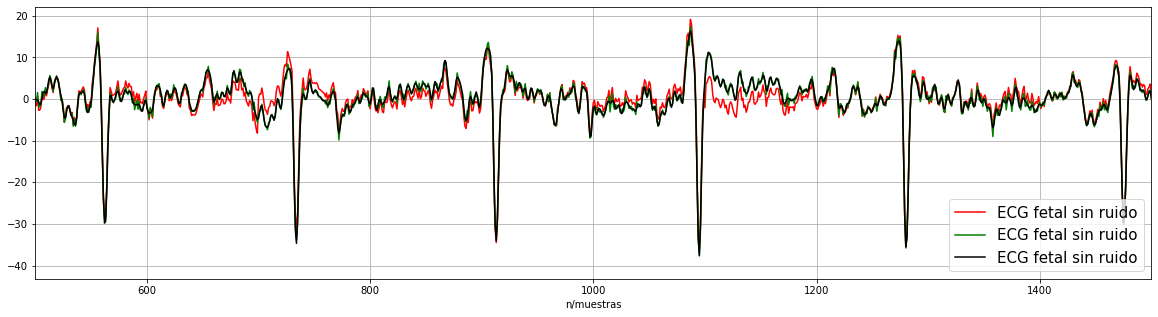

In [201]:
y6_2 = señal(esp_6c)
y6_3 = señal(esp_bfill6)

plt.figure(figsize=(20,5))
#plt.plot(n6,-ECGfetal,label="Presión contaminada")
plt.plot(n6,y6,label="ECG fetal sin ruido",color="r") #detrend solo
plt.plot(n6,y6_2,label="ECG fetal sin ruido",color="g") #reducción de comp de baja frec
plt.plot(n6,y6_3,label="ECG fetal sin ruido",color="k") #reducción de comp de alta frec
plt.xlabel ("n/muestras")
plt.legend (fontsize=15)
plt.xlim (500,1500)
plt.grid (True)
plt.show()